# RDKit

In [67]:
LIBRARY='rdkit'

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [69]:
np.random.seed(0)

# Data

In [70]:
with open('../DATA_train.pkl', 'rb') as file:
    data_train=pickle.load(file)
with open('../DATA_test.pkl', 'rb') as file:
    data_test=pickle.load(file)

data_train.shape,data_test.shape

((129, 4725), (56, 4725))

In [71]:
data_train

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,rdkit_mol,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
25,26,CHO,1,-1.50,CHO_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b01cc0dc0>,6,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
159,164,OH,2 3 7 8,-1.99,OH_R2378_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b01cc0810>,17,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21,21,F,1,-1.63,F_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b01cc08b8>,13,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
163,168,NO2,1 3,-0.96,NO2_R13_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b01cc0f80>,15,1.0,0.0,1.0,...,0,0,1,0,0,1,0,1,0,0
149,154,OH,1 2 3 6,-1.76,OH_R1236_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b01cc06c0>,17,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,155,OH,1 2 3 7,-1.87,OH_R1237_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b6238dae8>,17,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
56,58,CN,1 3 6,-0.85,CN_R136_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b74ab0810>,7,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
184,189,NO2,1 2 3 4 6 7 8 9,0.80,NO2_R12346789_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b74ab0110>,15,1.0,1.0,1.0,...,1,0,1,1,0,1,0,1,0,0
92,95,NH2,1 7,-2.02,NH2_R17_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b74ab0dc0>,14,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0


In [72]:
data_test

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,rdkit_mol,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
73,75,CN,1 2 6 7,-0.52,CN_R1267_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c53e8>,7,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
20,20,CH3,2,-1.79,CH3_R2_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c56c0>,5,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27,28,COCH3,1,-1.58,COCH3_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5b90>,8,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
145,149,OH,1 3 7,-1.84,OH_R137_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5928>,17,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
30,31,CONH2,2,-1.63,CONH2_R2_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5f80>,9,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
176,181,NO2,1 2 4 6,-0.36,NO2_R1246_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5ca8>,15,1.0,1.0,0.0,...,1,0,1,1,0,1,0,1,0,0
167,172,NO2,1 9,-1.14,NO2_R19_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c56f8>,15,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
122,126,NH2,1 2 7 8,-2.22,NH2_R1278_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5068>,14,1.0,1.0,0.0,...,0,0,1,0,0,1,0,1,0,0
53,55,CN,1 2 7,-0.80,CN_R127_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5ea0>,7,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
78,81,CN,1 3 6 9,-0.56,CN_R1369_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f7b615c5458>,7,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0


In [73]:
# #TEST DATA
# size=10
# feat_2d=[col for col in data_train.columns if f'_2d_{LIBRARY}' in col][:size]
# feat_3d=[col for col in data_train.columns if f'_3d_{LIBRARY}' in col][:size]
# feat_fp=[col for col in data_train.columns if f'_fp_' in col][:size]
# feat_cols=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol']+feat_2d+feat_3d+feat_fp
# data_train=data_train[feat_cols]
# data_test=data_test[feat_cols]
# data_train.shape,data_test.shape

# Preprocessing

In [74]:
X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 4719) (129,)
(56, 4719) (56,)


In [75]:
from sklearn.preprocessing import StandardScaler

numerical_cols=[col for col in X_train.columns if '_2d_rdkit' in col]
numerical_cols+=[col for col in X_train.columns if '_3d_rdkit' in col]
numerical_cols+=[col for col in X_train.columns if '_2d_mordred' in col]
numerical_cols+=[col for col in X_train.columns if '_3d_mordred' in col]
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
for col in numerical_cols:
    scaler=StandardScaler().fit(X_train[col].values.reshape(-1,1))
    X_train_scaled[col]=scaler.transform(X_train[col].values.reshape(-1,1))
    X_test_scaled[col]=scaler.transform(X_test[col].values.reshape(-1,1))

In [76]:
X_train_scaled.describe().to_csv('DESCRIBE_X_train_scaled.csv',index_label='stat')
X_test_scaled.describe().to_csv('DESCRIBE_X_test_scaled.csv',index_label='stat')

In [78]:
feat_cols_2d_3d_fp=[col for col in X_train_scaled.columns if f'_2d_basic' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if '_fp_' in col]
X_train_scaled_2d_3d_fp=X_train_scaled[feat_cols_2d_3d_fp]
X_test_scaled_2d_3d_fp=X_test_scaled[feat_cols_2d_3d_fp]

# feat_cols_2d_3d=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
# feat_cols_2d_3d+=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
# X_train_scaled_2d_3d=X_train_scaled[feat_cols_2d_3d]
# X_test_scaled_2d_3d=X_test_scaled[feat_cols_2d_3d]

feat_cols_2d_basic=[col for col in X_train_scaled.columns if f'_2d_basic' in col]
X_train_scaled_2d_basic=X_train_scaled[feat_cols_2d_basic]
X_test_scaled_2d_basic=X_test_scaled[feat_cols_2d_basic]

feat_cols_2d=[col for col in X_train_scaled.columns if f'_2d_basic' in col]
feat_cols_2d+=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
X_train_scaled_2d=X_train_scaled[feat_cols_2d]
X_test_scaled_2d=X_test_scaled[feat_cols_2d]

feat_cols_3d=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
X_train_scaled_3d=X_train_scaled[feat_cols_3d]
X_test_scaled_3d=X_test_scaled[feat_cols_3d]

feat_cols_fp=[col for col in X_train_scaled.columns if f'_fp_' in col]
X_train_scaled_fp=X_train_scaled[feat_cols_fp]
X_test_scaled_fp=X_test_scaled[feat_cols_fp]

print(X_train_scaled_2d_3d_fp.shape,X_test_scaled_2d_3d_fp.shape)
# print(X_train_scaled_2d_3d.shape,X_test_scaled_2d_3d.shape)
print(X_train_scaled_2d_basic.shape,X_test_scaled_2d_basic.shape)
print(X_train_scaled_2d.shape,X_test_scaled_2d.shape)
print(X_train_scaled_3d.shape,X_test_scaled_3d.shape)
print(X_train_scaled_fp.shape,X_test_scaled_fp.shape)

(129, 3510) (56, 3510)
(129, 9) (56, 9)
(129, 151) (56, 151)
(129, 869) (56, 869)
(129, 2490) (56, 2490)


# Examples

## - Baseline Models

### 1. Linear Regression

R^2 = 0.9836326970942367


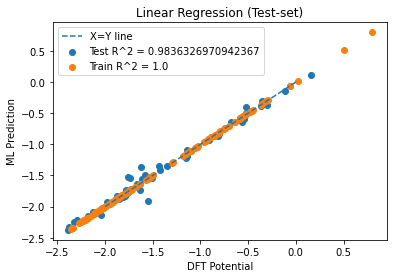

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled_2d_3d_fp, y_train)

y_pred=reg.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)

y_pred_train=reg.predict(X_train_scaled_2d_3d_fp)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Linear Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 2. SVR

R^2 = 0.8754549904906076


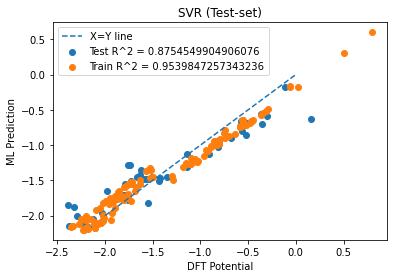

In [13]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled_2d_3d_fp, y_train)

y_pred=svr.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)


y_pred_train=svr.predict(X_train_scaled_2d_3d_fp)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('SVR (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 3. Gradient Boosting Regression

R^2 = 0.9814083116610144


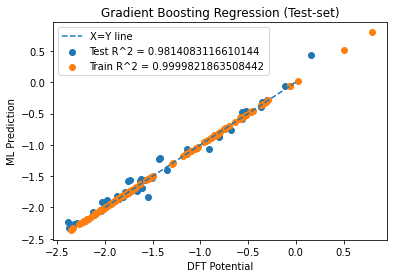

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled_2d_3d_fp, y_train)

y_pred=gbr.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)

y_pred_train=gbr.predict(X_train_scaled_2d_3d_fp)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Gradient Boosting Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

## - Hyper-Parameter Tuning (Kernel Ridge Regression)

{'alpha': 0.0001, 'gamma': 1e-06, 'kernel': 'sigmoid'}
R^2 = 0.9183490552227941
R^2 = 0.984132349272869


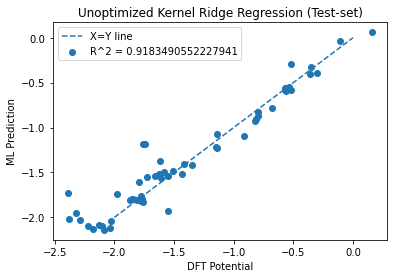

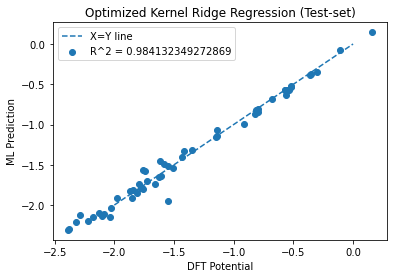

In [15]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':np.linspace(1e-4,1,10)}

scoring = ['neg_mean_squared_error','r2']

estimator = KernelRidge()

krr_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1
                 )
krr_gs.fit(X_train_scaled_2d_3d_fp, y_train)
display.clear_output()
print(krr_gs.best_params_)

plt.figure()
krr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled_2d_3d_fp, y_train)
y_pred=krr_reg.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Unoptimized Kernel Ridge Regression (Test-set)')
plt.legend()

plt.figure()
y_pred=krr_gs.best_estimator_.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Optimized Kernel Ridge Regression (Test-set)')
plt.legend()

## Feature Importance

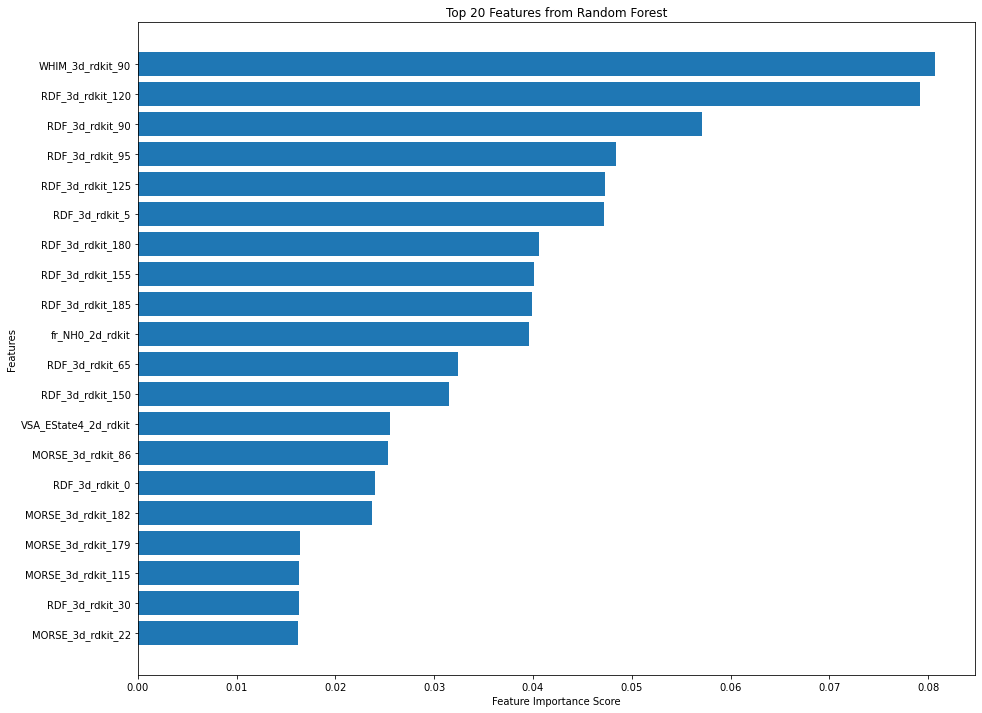

In [16]:
from sklearn.ensemble import RandomForestRegressor

feat_idx2name={idx:col for idx,col in enumerate(X_train_scaled_2d_3d_fp.columns)}
feat_name2idx={col:idx for idx,col in enumerate(X_train_scaled_2d_3d_fp.columns)}
feat_name_list=X_train_scaled_2d_3d_fp.columns

ntop=20
rf_reg=RandomForestRegressor().fit(X_train_scaled_2d_3d_fp, y_train)
rf_feat_score = rf_reg.feature_importances_
rf_feat_score_sorted_idx=rf_feat_score.argsort()
plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:feat_idx2name[x],rf_feat_score_sorted_idx))
plt.barh(rf_top_features[-ntop:],rf_feat_score[rf_feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Random Forest')
plt.show()

## - Model Performance on Top 20 Features (CV)

(129, 3510) (56, 3510)
R^2 = 0.9730206565127484


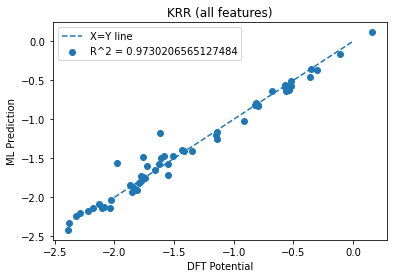

(129, 20) (56, 20)
R^2 = -3.733209126049651


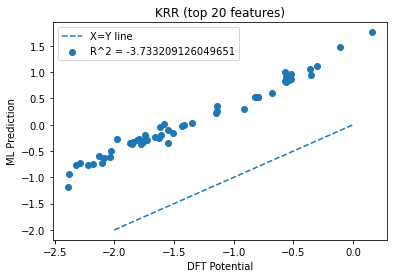

In [17]:
from sklearn.kernel_ridge import KernelRidge

print(X_train_scaled_2d_3d_fp.shape,X_test_scaled_2d_3d_fp.shape)
krr_reg=KernelRidge().fit(X_train_scaled_2d_3d_fp, y_train)
y_pred=krr_reg.predict(X_test_scaled_2d_3d_fp)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (all features)')
plt.legend()
plt.show()

plt.figure()
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train,_X_test=X_train_scaled_2d_3d_fp.iloc[:,rf_top_features_idx[-ntop:]],X_test_scaled_2d_3d_fp.iloc[:,rf_top_features_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
krr_reg =KernelRidge().fit(_X_train, y_train)
y_pred=krr_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (top 20 features)')
plt.legend()


# Multiple Models

## Unoptimized Models

## Optimized Models (Hyper-parameter Tuning)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor



MODELS_DICT_UNOPT={'linear_reg':LinearRegression(),
             'ridge':Ridge(),
             'lasso':Lasso(),
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':ElasticNet(),
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':LassoLars(),
             'omp':OrthogonalMatchingPursuit(),
             'bayesian_ridge':BayesianRidge(),
             'ARDR':ARDRegression(),
             'PA':PassiveAggressiveRegressor(),
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':HuberRegressor(epsilon=1,
                                     alpha=1e-3,
                                     tol=1e-6,
                                     max_iter=50000),
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':KernelRidge(kernel='rbf'),
             'SVR':SVR(),
             'gaussian_process':GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
             'decision_tree':DecisionTreeRegressor(),
             'bagging':BaggingRegressor(),
             'random_forest':RandomForestRegressor(),
             'ada_boost':AdaBoostRegressor(),
             'gradient_boosting_reg':GradientBoostingRegressor(),
#              'hist_gradient_boosting_reg':HistGradientBoostingRegressor(),
             'neural_network':MLPRegressor(hidden_layer_sizes=(50,20),
                                            max_iter=10000),
             'knn_reg':KNeighborsRegressor()
            }

PARAM_GRID_DICT={'linear_reg':{'fit_intercept':[True,False],
                               'normalize':[True,False],
                               'positive':[True,False]
                              },
                 'ridge':{'alpha':[0.5,1,1.5],
                          'tol':[1e-3,1e-4,1e-5],
                          'max_iter':[500,1000,5000],
                          'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                         },
                 'lasso':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                          'positive':[True,False],
                          'tol':[1e-4,1e-5,1e-6,1e-7],
                          'max_iter':[100,200,500,1000],
                         },
    #              'multitask_lasso':MultiTaskLasso(),
                 'elastic_net':{'alpha':[0.5,1,1.5],
                                'l1_ratio':[0.2,0.5,0.8],
                                'positive':[True,False],
                                'tol':[1e-3,1e-4,1e-5],
                                'max_iter':[500,1000,5000]
                               },
    #              'multitask_elastic_net':MultiTaskElasticNet(),
    #              'lars':Lars(n_nonzero_coefs=50),
                 'lasso_lars':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                                'jitter':[None,0.1,1,10,100],
                                'positive':[True,False],
                                'max_iter':[100,200,500,1000],
                               },
                 'omp':{#'n_nonzero_coefs':[None,5,10,20],
    #                   'tol':[0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7]
                       },
                 'bayesian_ridge':{'n_iter':[200,300,500],
                                   'tol':[1e-2,1e-3,1e-4],
                                   'alpha_1':[1e-5,1e-6,1e-7],
                                   'alpha_2':[1e-5,1e-6,1e-7],
                                   'lambda_1':[1e-5,1e-6,1e-7],
                                   'lambda_2':[1e-5,1e-6,1e-7],
                                  },
                 'ARDR':{'n_iter':[200,300,500],
                         'tol':[1e-2,1e-3,1e-4],
                         'alpha_1':[1e-5,1e-6,1e-7],
    #                      'alpha_2':[1e-5,1e-6,1e-7],
                         'lambda_1':[1e-5,1e-6,1e-7],
    #                      'lambda_2':[1e-5,1e-6,1e-7],
    #                      'threshold_lambda':[5000,10000,20000]
                        },
                 'PA':{'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.15],
                       'max_iter':[100,200,500,1000,1500,2000],
                       'tol':[1e-5,1e-6,1e-7,1e-8],
    #                    'early_stopping':[True,False],
    #                    'average':[True,False],
    #                    'validation_fraction':[0.05,0.1,0.2]
                      },
    #              'RANSAC':RANSACRegressor(min_samples=129)),
                 'huber':{'epsilon':[1,1.35,1.5],
                          'alpha':[1e-3,1e-4,1e-5],
                          'tol':[1e-5,1e-6,1e-7],
                          'max_iter':[1000,50000]
                         },
    #              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
    #                                                ('linear', LinearRegression(fit_intercept=True))]),
                 'kernel_ridge':{'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
                                 'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
                                 'alpha':[0.01,0.1,1,5,10,100]
                                },
                 'SVR':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                        'C':[0.5,1,1.5],
                        'tol':[1e-2,1e-3,1e-4],
                        'gamma':['scale','auto']
                       },
                 'gaussian_process':{'kernel':[DotProduct()+WhiteKernel(),
                                               RBF()+WhiteKernel(),
                                               34.4**2 * RBF(length_scale=41.8)
                                                + 3.27**2 * RBF() * ExpSineSquared()
                                                + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
                                                + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336),
                                               ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
                                              ],
                                     'alpha':[1e-9,1e-10,1e-11]
                                    },
                 'decision_tree':{#'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
    #                               'splitter':['best','random'],
    #                               'max_features':['auto', 'sqrt', 'log2'],
    #                               'ccp_alpha':[-1,0,0.1,0.5,1],
                                  'max_depth':[None,10,20,50,100,200]
                                 },
                 'bagging':{'n_estimators': np.arange(50,1000,50),
                            'bootstrap':[True,False],
                            'bootstrap_features':[True,False],
                            'oob_score':[True,False]
                           },
                 'random_forest':{'n_estimators': np.arange(50,501,50),
                                  'bootstrap':[True,False],
                                  'oob_score':[True,False],
    #                               'criterion':['mse', 'mae'],
    #                               'max_features':['auto', 'sqrt', 'log2'],
    #                               'ccp_alpha':[0,0.5,1]
                                  },
                 'ada_boost':{'n_estimators': np.arange(50,501,50),
                              'learning_rate':[0.5,1,1.5],
                              'loss':['linear', 'square', 'exponential']
                             },
                 'gradient_boosting_reg':{#'loss':['ls', 'lad', 'huber', 'quantile'],
    #                                       'learning_rate':[0.5,1,1.5],
                                          'n_estimators': np.arange(50,501,50),
    #                                       'criterion':['friedman_mse', 'mse', 'mae'],
                                          'max_depth':[2,3,10,20,50],
    #                                       'max_features':['auto', 'sqrt', 'log2'],
    #                                       'alpha':[0.6,0.9,1.2],
                                          'tol':[1e-2,1e-3,1e-4],
    #                                       'ccp_alpha':[0.5,1,1.5]
                                         },
    #              'hist_gradient_boosting_reg':{},
                 'neural_network':{'hidden_layer_sizes':[(10,10,10),(50,30,20),(80,60,30)],
                                   'activation':['logistic', 'tanh', 'relu'],
                                   'solver':['lbfgs', 'sgd', 'adam'],
                                   'learning_rate':['constant', 'invscaling', 'adaptive'],
                                   'early_stopping':[True,False]
                                  },
                 'knn_reg':{'n_neighbors':np.arange(1,10,2),
                            'weights':['uniform', 'distance'],
                            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'leaf_size':[40,50,75]
                           }
                }
print(f'Total Models = {len(PARAM_GRID_DICT)}')
print(f'Total Models = {len(MODELS_DICT_UNOPT)}')

Total Models = 20
Total Models = 20


In [19]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def gridSearch(feat_type,X,y,models_dict_unopt,param_grid_dict,read=False):
    outfile_name=f'MODEL_OPT_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_df
        else:
            pass
        
    gs_results_dict={'feat_set':[],'model_name':[],'gs_obj':[],'opt_model':[],'opt_params':[],}
    scoring='neg_mean_squared_error'
    # test_model='PA'
    # for model_name,param_grid in [(test_model,param_grid_dict[test_model])]:
    for model_name,param_grid in param_grid_dict.items():
        print(model_name)
        unopt_estimator=models_dict_unopt[model_name]
        gs = GridSearchCV(unopt_estimator,
                          param_grid=param_grid,
                          scoring=scoring,
                          refit=True,
                          return_train_score=True,
                          cv=10,
                          verbose=1,
                          n_jobs=-1
                         )
        gs.fit(X, y)
        gs_results_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        gs_results_dict['model_name'].append(model_name)
        gs_results_dict['gs_obj'].append(gs)
        gs_results_dict['opt_model'].append(gs.best_estimator_)
        gs_results_dict['opt_params'].append(gs.best_params_)
    clear_output()
    model_opt_df=pd.DataFrame.from_dict(gs_results_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(model_opt_df,outfile)
    return model_opt_df

def cv(feat_type,opt_models,X,y,read=False):
    outfile_name=f'CV_RESULT_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_d
        else:
            pass
    
    num_folds=10
    cv_result_dict={'feat_set':[],'model_name':[],'cv_score_obj':[],'cv_mean_test_r2':[],'cv_mean_test_mse':[],'cv_mean_test_mae':[]}
    scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error']
    pbar=tqdm(opt_models.iterrows())
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        model=row['opt_model']
        scores=cross_validate(model,
                              X,
                              y,
                              cv=num_folds,
                              scoring=scoring,
                              return_train_score=True,
                              n_jobs=-1
                             )
                            
        cv_mean_test_r2=scores['test_r2'].mean()
        cv_mean_test_mse=-scores['test_neg_mean_squared_error'].mean()
        cv_mean_test_mae=-scores['test_neg_mean_absolute_error'].mean()
        cv_result_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        cv_result_dict['model_name'].append(model_name)
        cv_result_dict['cv_score_obj'].append(scores)
        cv_result_dict['cv_mean_test_r2'].append(cv_mean_test_r2)
        cv_result_dict['cv_mean_test_mse'].append(cv_mean_test_mse)
        cv_result_dict['cv_mean_test_mae'].append(cv_mean_test_mae)
    cv_result_df=pd.DataFrame.from_dict(cv_result_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(cv_result_df,outfile)
    return cv_result_df

def trainTestErrors(feat_type,opt_models,X_train,y_train,X_test,y_test,read=False):
    outfile_name=f'TRAIN_TEST_ERROR_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_df
        else:
            pass
        
    train_test_error_dict={'feat_set':[],'model_name':[],'train_r2':[],'train_mse':[],'train_mae':[],'test_r2':[],'test_mse':[],'test_mae':[],'pred_train':[],'pred_test':[]}
    pbar=tqdm(opt_models.iterrows())
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        model=row['opt_model']
        pred_train=model.predict(X_train)
        train_r2=r2_score(y_train,pred_train)
        train_mse=mean_squared_error(y_train,pred_train)
        train_mae=mean_absolute_error(y_train,pred_train)
        pred_test=model.predict(X_test)
        test_r2=r2_score(y_test,pred_test)
        test_mse=mean_squared_error(y_test,pred_test)
        test_mae=mean_absolute_error(y_test,pred_test)
        train_test_error_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        train_test_error_dict['model_name'].append(model_name)
        train_test_error_dict['train_r2'].append(train_r2)
        train_test_error_dict['train_mse'].append(train_mse)
        train_test_error_dict['train_mae'].append(train_mae)
        train_test_error_dict['test_r2'].append(test_r2)
        train_test_error_dict['test_mse'].append(test_mse)
        train_test_error_dict['test_mae'].append(test_mae)
        train_test_error_dict['pred_train'].append(pred_train)
        train_test_error_dict['pred_test'].append(pred_test)
    train_test_error_df=pd.DataFrame.from_dict(train_test_error_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(train_test_error_df,outfile)
    return train_test_error_df

def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

def getModelPerformance(feat_type,X_train,y_train,X_test,y_test,read=False):
    outfile_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_performance_df=getDataFromFile(outfile_name)
        if model_performance_df is not None:
            return model_performance_df
        else:
            pass

    _model_opt_df=gridSearch(feat_type,X_train,y_train,MODELS_DICT_UNOPT,PARAM_GRID_DICT,read=read)
    _cv_result_df=cv(feat_type,_model_opt_df,X_train,y_train,read=read)
    _train_test_error_df=trainTestErrors(feat_type,_model_opt_df,X_train,y_train,X_test,y_test,read=read)
    model_performance_df=_model_opt_df.merge(_cv_result_df.drop(columns='feat_set'),how='left',on='model_name')
    model_performance_df=model_performance_df.merge(_train_test_error_df.drop(columns='feat_set'),how='left',on='model_name')
    with open(outfile_name,'wb') as outfile:
        pickle.dump(model_performance_df,outfile)
    return model_performance_df

In [20]:
%%time

feat_type='2d+3d+fp'

model_performance_df_2d_3d_fp=getModelPerformance(feat_type,
                    X_train_scaled_2d_3d_fp,y_train,
                    X_test_scaled_2d_3d_fp,y_test,
                    read=False                            
                   )

model_performance_df_2d_3d_fp

knn_reg: : 20it [01:46,  5.31s/it]              
knn_reg: : 20it [00:02,  9.43it/s]              


CPU times: user 5min 56s, sys: 10min 54s, total: 16min 50s
Wall time: 1h 56min 7s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d+3d+fp_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.0657804012298584, 0.0840871334...",0.981218,0.006885,0.057603,1.000000,2.323014e-30,1.087551e-15,0.983633,0.007182,0.054609,"[-1.5000000000000007, -1.990000000000003, -1.6...","[-0.49060582826259436, -1.8262433804162759, -1..."
1,2d+3d+fp_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='saga')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...","{'fit_time': [3.8878326416015625, 3.8630144596...",0.985804,0.005289,0.049901,0.998860,5.340961e-04,1.438468e-02,0.984936,0.006610,0.049389,"[-1.4960198448027169, -1.9685579896025773, -1....","[-0.5173810162109673, -1.7730404778162607, -1...."
2,2d+3d+fp_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=200)","{'alpha': 0.01, 'max_iter': 200, 'positive': F...","{'fit_time': [0.2049264907836914, 0.1882381439...",0.982563,0.006429,0.059300,0.993749,2.929064e-03,4.288517e-02,0.986833,0.005778,0.051896,"[-1.5144419298211402, -1.8998616936478805, -1....","[-0.5591845548210033, -1.6470149192776293, -1...."
3,2d+3d+fp_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=500)","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.29672789573669434, 0.366970062...",0.921214,0.032845,0.144060,0.951663,2.265008e-02,1.261070e-01,0.931194,0.030192,0.145573,"[-1.4133503524447324, -1.8093096159097914, -1....","[-0.7319134954880528, -1.516289924805244, -1.3..."
4,2d+3d+fp_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.04145097732543945, 0.057959079...",0.940946,0.022788,0.125774,0.952021,2.248207e-02,1.251941e-01,0.940933,0.025918,0.130172,"[-1.5518365834850045, -1.7870824423695675, -1....","[-0.7366801435209304, -1.6230885261911228, -1...."
5,2d+3d+fp_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.0591278076171875, 0.1643273830...",-0.538743,0.391273,0.231695,1.000000,3.885496e-30,1.378177e-15,0.986087,0.006105,0.062759,"[-1.5000000000000013, -1.9900000000000027, -1....","[-0.6114844348257186, -1.8245318909288235, -1...."
6,2d+3d+fp_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.8038535118103027, 0.7907075881...",0.985076,0.005489,0.050877,0.999339,3.097601e-04,1.135890e-02,0.985324,0.006440,0.048332,"[-1.4926389735583379, -1.9700616822885928, -1....","[-0.5125509257561114, -1.7839806268448195, -1...."
7,2d+3d+fp_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-05, 'n_iter'...","{'fit_time': [1.2034506797790527, 1.3504624366...",0.951909,0.013166,0.059959,0.999906,4.401009e-05,5.164834e-03,0.987330,0.005559,0.047256,"[-1.503065350487377, -1.9874719066492483, -1.6...","[-0.5031825847524157, -1.7325098218548352, -1...."
8,2d+3d+fp_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=1.1, max_iter=500...","{'C': 1.1, 'max_iter': 500, 'tol': 1e-05}","{'fit_time': [0.10072064399719238, 0.071958065...",0.878591,0.035062,0.110973,0.991469,3.997304e-03,5.328379e-02,0.954737,0.019861,0.097249,"[-1.4014184580016, -2.0271252251846694, -1.552...","[-0.5220684512532241, -1.6293599778044097, -1...."
9,2d+3d+fp_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(epsilon=1.5, max_iter=1000)","{'alpha': 0.0001,

In [21]:
# %%time

# feat_type='2d+3d'

# model_performance_df_2d_3d=getModelPerformance(feat_type,
#                     X_train_scaled_2d_3d,y_train,
#                     X_test_scaled_2d_3d,y_test,
#                     read=False                            
#                    )

# model_performance_df_2d_3d

In [22]:
%%time

feat_type='2d'

model_performance_df_2d=getModelPerformance(feat_type,
                    X_train_scaled_2d,y_train,
                    X_test_scaled_2d,y_test,
                    read=False                            
                   )

model_performance_df_2d

knn_reg: : 20it [00:09,  2.15it/s]              
knn_reg: : 20it [00:00, 54.98it/s]              


CPU times: user 2min 1s, sys: 2min 49s, total: 4min 50s
Wall time: 9min 4s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...","LinearRegression(fit_intercept=False, normaliz...","{'fit_intercept': False, 'normalize': True, 'p...","{'fit_time': [0.008074522018432617, 0.01325607...",-4963.395982,1302.876820,6.674991,0.998249,8.207054e-04,1.768675e-02,-59.214228,26.421986,1.082578,"[-1.5000000000000093, -1.928244440910217, -1.6...","[-0.4856765670311766, -1.9107442589119674, -28..."
1,2d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1, max_iter=500, solver='saga')","{'alpha': 1, 'max_iter': 500, 'solver': 'saga'...","{'fit_time': [0.1556868553161621, 0.1139152050...",0.976712,0.006866,0.054058,0.996012,1.868623e-03,2.982820e-02,0.991583,0.003693,0.045374,"[-1.50074982270654, -1.9724129037359845, -1.63...","[-0.5201381763734361, -1.812866085855766, -1.4..."
2,2d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=200)","{'alpha': 0.01, 'max_iter': 200, 'positive': F...","{'fit_time': [0.007988691329956055, 0.01122021...",0.976845,0.007806,0.067996,0.990137,4.621490e-03,5.504971e-02,0.985661,0.006292,0.059935,"[-1.566705862767009, -1.873918406905902, -1.56...","[-0.5537114451022671, -1.6933020352224928, -1...."
3,2d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.011229276657104492, 0.01203155...",0.898962,0.037073,0.157747,0.932618,3.157394e-02,1.488199e-01,0.913284,0.038051,0.158559,"[-1.4918746890067647, -1.7741686556979892, -1....","[-0.7129058859827293, -1.569511439254661, -1.4..."
4,2d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.009154558181762695, 0.01062011...",0.927950,0.027333,0.139658,0.942238,2.706625e-02,1.408663e-01,0.936042,0.028065,0.137345,"[-1.680361065081961, -1.770252022782571, -1.65...","[-0.6949426407284318, -1.6978085651307557, -1...."
5,2d_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.005458831787109375, 0.00964212...",0.915988,0.054563,0.079798,0.994009,2.807282e-03,3.890142e-02,0.987576,0.005452,0.056656,"[-1.5493702727604024, -1.98742851738615, -1.63...","[-0.5585269837320781, -1.815043337840883, -1.6..."
6,2d_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.013967275619506836, 0.01081156...",0.975094,0.007182,0.053666,0.996355,1.708019e-03,2.824419e-02,0.991516,0.003723,0.045245,"[-1.5003303201012366, -1.9645995810806065, -1....","[-0.5244734236595179, -1.823322711139056, -1.4..."
7,2d_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(alpha_1=1e-07, lambda_1=1e-07, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-07, 'n_iter'...","{'fit_time': [0.035285234451293945, 0.08896780...",0.976802,0.007366,0.058233,0.995634,2.045775e-03,3.330847e-02,0.987427,0.005517,0.053955,"[-1.4639097993690495, -1.9666073673322046, -1....","[-0.5127335391076873, -1.8505169649872615, -1...."
8,2d_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=1.15, tol=1e-05)","{'C': 1.15, 'max_iter': 1000, 'tol': 1e-05}","{'fit_time': [0.005890369415283203, 0.00866818...",0.746491,0.072708,0.149894,0.962648,1.750265e-02,1.142710e-01,0.951150,0.021435,0.124752,"[-1.4780112693855145, -2.0440595098165133, -1....","[-0.39938215820984674, -1.6370387954512966, -1..."
9,2d_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=1e-05, epsilon=1, max_ite...","{'alpha': 1e-05, 'epsilon': 1, '

In [23]:
%%time

feat_type='3d'

model_performance_df_3d=getModelPerformance(feat_type,
                    X_train_scaled_3d,y_train,
                    X_test_scaled_3d,y_test,
                    read=False                            
                   )

model_performance_df_3d

knn_reg: : 20it [00:38,  1.91s/it]              
knn_reg: : 20it [00:01, 19.39it/s]              


CPU times: user 3min 13s, sys: 5min 48s, total: 9min 1s
Wall time: 46min 3s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,3d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.031394243240356445, 0.02464509...",0.949764,0.017751,0.098245,0.999993,0.000003,0.000233,0.921683,0.034366,0.123224,"[-1.4999999999999996, -1.9900000000000007, -1....","[-0.5450966475473376, -1.9359589000278172, -1...."
1,3d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=1000, solver='saga')","{'alpha': 1.5, 'max_iter': 1000, 'solver': 'sa...","{'fit_time': [0.8947174549102783, 1.0898363590...",0.981356,0.007828,0.062584,0.996559,0.001612,0.027934,0.974693,0.011105,0.058460,"[-1.4261944398844826, -1.9704690616128406, -1....","[-0.5234075825142999, -1.7913141868263547, -1...."
2,3d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, tol=1e-05)","{'alpha': 0.01, 'max_iter': 1000, 'positive': ...","{'fit_time': [0.08701586723327637, 0.078954696...",0.974985,0.010398,0.072013,0.992340,0.003589,0.046988,0.976475,0.010323,0.063236,"[-1.4111819468980429, -1.9065602686292062, -1....","[-0.5811005505626833, -1.7588526235165962, -1...."
3,3d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.03110527992248535, 0.025349378...",0.924390,0.032917,0.142464,0.951889,0.022544,0.124529,0.936771,0.027745,0.134784,"[-1.4990468103297894, -1.788527965066169, -1.6...","[-0.7552539673319221, -1.6886808012537378, -1...."
4,3d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.013657569885253906, 0.01632666...",0.937215,0.023051,0.123369,0.946939,0.024863,0.131120,0.931120,0.030224,0.138141,"[-1.5034636005013708, -1.783077269539849, -1.6...","[-0.7916362452278538, -1.6866402310035307, -1...."
5,3d_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.020017623901367188, 0.02030134...",0.301372,0.308524,0.198211,0.999461,0.000252,0.011602,0.869123,0.057429,0.156787,"[-1.4818501787592382, -1.9882111655494619, -1....","[-0.4815226805524251, -1.9400019703460356, -1...."
6,3d_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.047701358795166016, 0.04096388...",0.982023,0.007564,0.060898,0.997237,0.001295,0.025053,0.975784,0.010626,0.058687,"[-1.4427367936431141, -1.9673369889076173, -1....","[-0.5218147912133556, -1.794732364871511, -1.4..."
7,3d_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-05, 'n_iter'...","{'fit_time': [0.3489978313446045, 0.3017659187...",0.912010,0.031130,0.098540,0.999594,0.000190,0.009452,0.945808,0.023780,0.104937,"[-1.5070750176544372, -1.9922869654322257, -1....","[-0.5240883133686437, -1.8687120268957425, -1...."
8,3d_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=1.1, max_iter=500...","{'C': 1.1, 'max_iter': 500, 'tol': 1e-05}","{'fit_time': [0.04340052604675293, 0.053344964...",-3.008324,1.543429,0.606588,0.987873,0.005683,0.068713,0.947344,0.023105,0.107321,"[-1.394385575823116, -1.887900438376271, -1.52...","[-0.4635092909067653, -1.7482819722155756, -1...."
9,3d_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=1e-05, epsilon=1.5, max_i...","{'alpha': 1e-05, 'epsilon': 1.5, 'max_iter': 5...","{'fit_time': [9.230618476867676, 8.02116227149...",-1.422382,0.852220,0.399186,0.999580,0.00

In [24]:
%%time

feat_type='fp_deepchem'

model_performance_df_fp=getModelPerformance(feat_type,
                    X_train_scaled_fp,y_train,
                    X_test_scaled_fp,y_test,
                    read=False                            
                   )

model_performance_df_fp

knn_reg: : 20it [01:01,  3.10s/it]              
knn_reg: : 20it [00:02,  9.22it/s]              


CPU times: user 5min 30s, sys: 9min 34s, total: 15min 4s
Wall time: 1h 2min 53s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,fp_deepchem_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(positive=True),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.2262132167816162, 0.2087075710...",0.056836,0.368560,0.473251,0.999963,0.000017,0.000698,0.303355,0.305688,0.464995,"[-1.4999999999999958, -1.9900000000000042, -1....","[0.43822587150445313, -2.0076671387335616, -1...."
1,fp_deepchem_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=1000, solver='saga')","{'alpha': 1.5, 'max_iter': 1000, 'solver': 'sa...","{'fit_time': [1.6884410381317139, 1.8920390605...",0.917159,0.033501,0.121222,0.997881,0.000993,0.018229,0.927284,0.031908,0.142360,"[-1.4986496351733176, -1.8905694782018756, -1....","[-0.3814807438666554, -1.6435547051918786, -1...."
2,fp_deepchem_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...",Lasso(alpha=0.01),"{'alpha': 0.01, 'max_iter': 1000, 'positive': ...","{'fit_time': [0.2747993469238281, 0.1643829345...",0.916020,0.039101,0.127476,0.960320,0.018593,0.087672,0.931707,0.029967,0.132333,"[-1.5622103576346507, -1.9116271831936007, -1....","[-0.5197403962207883, -1.651606040801758, -1.4..."
3,fp_deepchem_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.03831171989440918, 0.036751270...",0.701347,0.140308,0.272147,0.729635,0.126688,0.259256,0.715103,0.125013,0.276926,"[-1.4225526537451245, -1.7806821036555882, -1....","[-0.9060755868716475, -1.543041722685226, -1.4..."
4,fp_deepchem_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.05112314224243164, 0.040972709...",0.859900,0.068675,0.170341,0.879624,0.056406,0.155463,0.862620,0.060283,0.190763,"[-1.58357961005435, -1.9064655607868746, -1.56...","[-0.8058413530318349, -1.590795051720702, -1.5..."
5,fp_deepchem_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.05544424057006836, 0.062558889...",0.577787,0.150872,0.267763,0.999963,0.000017,0.000698,0.687355,0.137188,0.284947,"[-1.4999999999999987, -1.9899999999999962, -1....","[-0.44071004253605583, -1.8399060408762362, -1..."
6,fp_deepchem_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.44080114364624023, 0.251971006...",0.922951,0.033416,0.117933,0.988210,0.005524,0.046899,0.936306,0.027949,0.136005,"[-1.5074307792720478, -1.8574489954231463, -1....","[-0.4238246003573152, -1.633339943921163, -1.3..."
7,fp_deepchem_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(lambda_1=1e-05, n_iter=200, tol=...","{'alpha_1': 1e-06, 'lambda_1': 1e-05, 'n_iter'...","{'fit_time': [2.097738027572632, 1.90697813034...",0.903580,0.036291,0.124088,0.999897,0.000048,0.004885,0.901896,0.043048,0.149712,"[-1.5006539235971168, -1.9818068220911655, -1....","[-0.3727472018244278, -1.700261463947884, -1.1..."
8,fp_deepchem_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.6, max_iter=100...","{'C': 0.6, 'max_iter': 100, 'tol': 1e-05}","{'fit_time': [0.07216334342956543, 0.060269355...",0.807284,0.058755,0.167234,0.988270,0.005497,0.064545,0.891398,0.047655,0.169296,"[-1.450507621474002, -1.864879054784983, -1.54...","[-0.45515401894923696, -1.5809709322293646, -1..."
9,fp_deepchem_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=0.001, max_iter=50000)","{'alpha': 0.001, 'epsilon': 1.35, 'max_iter': .

# Feature Importance

In [25]:
#use all models trained on all featurs
#No Need to make correlation plot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV

def calcFeatureImportance(feat_type,model_performance_df,X_train,y_train,read=False):
    outfile_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        feat_imp_df=getDataFromFile(outfile_name)
        if feat_imp_df is not None:
            return feat_imp_df
        else:
            pass

    #Tree-Based
    feat_imp_df=pd.DataFrame()
    feat_cols=X_train.columns
    feat_imp_df['feat_name']=feat_cols
    for model_name in tqdm(['random_forest','ada_boost','gradient_boosting_reg']):
        print(model_name)
        model=model_performance_df[model_performance_df['model_name']==model_name]['opt_model'].values[0]
        model_feat_score=model.feature_importances_
        feat_imp_df[f'{model_name}_score']=model_feat_score
#         permutation_imp_selector = permutation_importance(model,
#                                           X_train, y_train,
#                                           scoring='neg_mean_squared_error',
#                                           n_jobs=-1)
#         permutation_imp_feat_score=permutation_imp_selector.importances_mean
#         permutation_imp_feat_score_std=permutation_imp_selector.importances_std
#         feat_imp_df[f'{model_name}_permutation_imp_score']=permutation_imp_feat_score
#         feat_imp_df[f'{model_name}_permutation_imp_score_std']=permutation_imp_feat_score_std
#         rfecv_selector = RFECV(model,
#                          scoring='neg_mean_squared_error',
#                          cv=10,
#                          n_jobs=-1)
#         rfecv_selector = rfecv_selector.fit(X_train, y_train)
#         rfecv_feat_ranking=rfecv_selector.ranking_
#         feat_imp_df[f'{model_name}_rfcv_feat_ranking']=rfecv_feat_ranking

    #K-Best
    kbest_selector=SelectKBest(mutual_info_regression,
                               k='all').fit(X_train, y_train)
    feat_score=kbest_selector.scores_
    feat_imp_df['kbest_selector_score']=feat_score
    
    with open(outfile_name,'wb') as outfile:
        pickle.dump(feat_imp_df,outfile)
    return feat_imp_df
#     #Permuation Importance
#     pbar=tqdm(model_performance_df_2d_3d_fp.iterrows())
#     feat_score_list=[]
#     for idx,row in pbar:
#         model_name=row['model_name']
#         pbar.set_description(model_name)
#         estimator=row['opt_model']
#         selector = permutation_importance(estimator,
#                                           X_train, y_train,
#                                           scoring='neg_mean_squared_error',
#                                           n_jobs=-1)
#         feat_score=selector.importances_mean
#         feat_score_list.append(feat_score)
#     mean_feat_score=np.array(feat_score_list).mean(axis=0)
#     feat_imp_df['permutation_imp_score_list']=feat_score_list
#     feat_imp_df['mean_permutation_imp_score']=mean_feat_score
#     with open(outfile_name,'wb') as outfile:
#             pickle.dump(feat_imp_df,outfile)


In [26]:
%%time

feat_type='2d+3d+fp'

feat_imp_df_2d_3d_fp=calcFeatureImportance(feat_type,
                    model_performance_df_2d_3d_fp,
                    X_train_scaled_2d_3d_fp,
                    y_train,
                    read=False                           
                   )

feat_imp_df_2d_3d_fp

100%|██████████| 3/3 [00:00<00:00, 98.56it/s]


random_forest
ada_boost
gradient_boosting_reg
CPU times: user 6.24 s, sys: 6 ms, total: 6.25 s
Wall time: 6.26 s


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,FG_no_2d_basic,2.635662e-06,0.0,0.000000,0.966356
1,FG_position_1_2d_basic,0.000000e+00,0.0,0.000000,0.000000
2,FG_position_2_2d_basic,2.151924e-07,0.0,0.000003,0.024999
3,FG_position_3_2d_basic,1.371738e-07,0.0,0.000001,0.160536
4,FG_position_4_2d_basic,1.023158e-04,0.0,0.000000,0.077464
...,...,...,...,...,...
3505,rdkit_fp_2042,0.000000e+00,0.0,0.000000,0.175550
3506,rdkit_fp_2043,0.000000e+00,0.0,0.000000,0.000000
3507,rdkit_fp_2044,4.083084e-08,0.0,0.000000,0.254778
3508,rdkit_fp_2046,5.700497e-06,0.0,0.000000,0.370223


In [27]:
%%time

feat_type='2d'

feat_imp_df_2d=calcFeatureImportance(feat_type,
                    model_performance_df_2d,
                    X_train_scaled_2d,
                    y_train,
                    read=False                           
                   )

feat_imp_df_2d

100%|██████████| 3/3 [00:00<00:00, 103.82it/s]

random_forest
ada_boost
gradient_boosting_reg


CPU times: user 286 ms, sys: 2 ms, total: 288 ms
Wall time: 285 ms


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,FG_no_2d_basic,2.344640e-05,0.0,0.000000,0.969998
1,FG_position_1_2d_basic,6.884808e-06,0.0,0.000166,0.000000
2,FG_position_2_2d_basic,1.979692e-06,0.0,0.000000,0.042166
3,FG_position_3_2d_basic,4.090822e-05,0.0,0.000607,0.146308
4,FG_position_4_2d_basic,4.916833e-06,0.0,0.000178,0.092498
...,...,...,...,...,...
146,fr_para_hydroxylation_2d_rdkit,1.125679e-05,0.0,0.000055,0.352926
147,fr_phenol_2d_rdkit,3.007864e-06,0.0,0.000000,0.242369
148,fr_phenol_noOrthoHbond_2d_rdkit,3.461980e-06,0.0,0.000000,0.245539
149,fr_priamide_2d_rdkit,2.757232e-08,0.0,0.000000,0.000963


In [28]:
%%time

feat_type='3d'

feat_imp_df_3d=calcFeatureImportance(feat_type,
                    model_performance_df_3d,
                    X_train_scaled_3d,
                    y_train,
                    read=False                           
                   )

feat_imp_df_3d

100%|██████████| 3/3 [00:00<00:00, 89.41it/s]

random_forest
ada_boost
gradient_boosting_reg


CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.41 s


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,Asphericity_3d_rdkit,3.394686e-07,0.000000,0.000000e+00,0.143435
1,Eccentricity_3d_rdkit,3.329041e-06,0.000000,2.631126e-07,0.152596
2,InertialShapeFactor_3d_rdkit,1.352199e-05,0.001503,0.000000e+00,0.403198
3,NPR1_3d_rdkit,1.521998e-06,0.000000,0.000000e+00,0.144039
4,NPR2_3d_rdkit,3.010900e-06,0.000002,0.000000e+00,0.218978
...,...,...,...,...,...
864,GETAWAY_3d_rdkit_268,2.815139e-04,0.000062,2.075790e-06,0.514084
865,GETAWAY_3d_rdkit_269,4.371535e-04,0.000645,3.761235e-08,0.540285
866,GETAWAY_3d_rdkit_270,5.512221e-04,0.005134,0.000000e+00,0.701819
867,GETAWAY_3d_rdkit_271,3.938700e-05,0.002337,2.329053e-04,0.638184


In [29]:
%%time

feat_type='fp_deepchem'

feat_imp_df_fp=calcFeatureImportance(feat_type,
                    model_performance_df_fp,
                    X_train_scaled_fp,
                    y_train,
                    read=False                           
                   )

feat_imp_df_fp

100%|██████████| 3/3 [00:00<00:00, 42.66it/s]

random_forest
ada_boost
gradient_boosting_reg


CPU times: user 4.04 s, sys: 0 ns, total: 4.04 s
Wall time: 4.04 s


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,ecfp4_fp_1,0.000000e+00,0.0,0.000000,0.000000
1,ecfp4_fp_2,0.000000e+00,0.0,0.000000,0.000000
2,ecfp4_fp_3,2.312005e-05,0.0,0.000000,0.010216
3,ecfp4_fp_5,2.225293e-06,0.0,0.000000,0.001490
4,ecfp4_fp_6,1.539747e-05,0.0,0.000006,0.000061
...,...,...,...,...,...
2485,rdkit_fp_2042,3.038985e-06,0.0,0.000000,0.187178
2486,rdkit_fp_2043,2.177103e-07,0.0,0.000000,0.000000
2487,rdkit_fp_2044,5.355867e-07,0.0,0.000000,0.266782
2488,rdkit_fp_2046,2.336592e-05,0.0,0.000000,0.383251


In [30]:
# %%time
# from sklearn.feature_selection import RFECV

# pbar=tqdm(model_opt_data_df.iterrows())
# for idx,row in pbar:
#     model_name=row['model_name']
#     pbar.set_description(model_name)
#     if model_name in ['huber','kernel_ridge','gaussian_process','bagging','neural_network','knn_reg']:
#         continue
#     estimator=row['best_model']
#     selector = RFECV(estimator,
#                      scoring='neg_mean_squared_error',
#                      cv=10,
#                      n_jobs=-1)
#     selector = selector.fit(X_train_scaled, y_train)
#     feat_score=selector.ranking_
#     feat_score_sorted_idx=feat_score.argsort()
#     feat_imp_dict[f'{model_name}_rfecv']=feat_score_sorted_idx



# feat_imp_df=pd.DataFrame.from_dict(feat_imp_dict)
# feat_imp_df
# from scipy import stats

# rfecv_cols=[col for col in feat_imp_df.columns if 'rfecv' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[rfecv_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_rfecv']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:20]

# perm_imp_cols=[col for col in feat_imp_df.columns if 'perm_imp' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[perm_imp_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_perm_imp']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:22]

## Best Model Error Vs. Num Features

In [42]:
from copy import deepcopy
#Perfomance Curve (wrt to no. of features) for best performing model on all features

def bestModelVsNumFeatures(rank_list,feat_type,model_performance_df,feat_imp_df,X_train,y_train,X_test,y_test,read=False):
    for rank in rank_list:
        outfile_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
        if read:
            model_vs_num_feat_df=getDataFromFile(outfile_name)
            if model_vs_num_feat_df is not None:
                continue
            else:
                pass

        best_model_row=model_performance_df.sort_values(by='test_mse').iloc[rank-1,:]
        best_model=deepcopy(best_model_row['opt_model'])
        best_model_name=best_model_row['model_name']
        print(best_model_name)
        best_model_vs_num_feat_dict={'feat_set':[],'model_name':[],'num_feat':[],'train_r2':[],'train_mse':[],'train_mae':[],'test_r2':[],'test_mse':[],'test_mae':[]}
        for num_feat in tqdm(range(1,X_train.shape[1])):
            feat_cols=feat_imp_df.sort_values(by='random_forest_score',ascending=False)['feat_name'].values[:num_feat]
            _X_train=X_train[feat_cols]
            _X_test=X_test[feat_cols]
            best_model=best_model.fit(_X_train,y_train)
            pred_train=best_model.predict(_X_train)
            train_r2=r2_score(y_train,pred_train)
            train_mse=mean_squared_error(y_train,pred_train)
            train_mae=mean_absolute_error(y_train,pred_train)
            pred_test=best_model.predict(_X_test)
            test_r2=r2_score(y_test,pred_test)
            test_mse=mean_squared_error(y_test,pred_test)
            test_mae=mean_absolute_error(y_test,pred_test)
            feat_set=set()
            for col in _X_train.columns:
                if '2d' in col:
                    feat_set.add('2d')
                if '3d' in col:
                    feat_set.add('3d')
                if 'fp' in col:
                    feat_set.add('fp')
            feat_set='+'.join(feat_set)+f'_{LIBRARY}'
            best_model_vs_num_feat_dict['feat_set'].append(feat_set)
            best_model_vs_num_feat_dict['model_name'].append(best_model_name)
            best_model_vs_num_feat_dict['num_feat'].append(num_feat)
            best_model_vs_num_feat_dict['train_r2'].append(train_r2)
            best_model_vs_num_feat_dict['train_mse'].append(train_mse)
            best_model_vs_num_feat_dict['train_mae'].append(train_mae)
            best_model_vs_num_feat_dict['test_r2'].append(test_r2)
            best_model_vs_num_feat_dict['test_mse'].append(test_mse)
            best_model_vs_num_feat_dict['test_mae'].append(test_mae)
        best_model_vs_num_feat_df=pd.DataFrame.from_dict(best_model_vs_num_feat_dict)
        with open(outfile_name,'wb') as outfile:
                pickle.dump(best_model_vs_num_feat_df,outfile)
        print(best_model_vs_num_feat_df)

In [32]:
%%time

feat_type='2d+3d+fp'
rank_list=[1,2]
bestModelVsNumFeatures(rank_list,
                       feat_type,
                       model_performance_df_2d_3d_fp,
                       feat_imp_df_2d_3d_fp,
                       X_train_scaled_2d_3d_fp,
                       y_train,
                       X_test_scaled_2d_3d_fp,
                       y_test,
                       read=False
                      )

  0%|          | 10/3509 [00:00<00:35, 98.50it/s]

ARDR


  0%|          | 10/3509 [00:00<00:37, 93.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010474461394241574, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010007262157262442, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010006623653523006, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarn

            feat_set model_name  num_feat  train_r2  train_mse  train_mae  \
0           3d_rdkit       ARDR         1  0.892085   0.050567   0.184592   
1           3d_rdkit       ARDR         2  0.896919   0.048302   0.180958   
2           3d_rdkit       ARDR         3  0.896918   0.048302   0.180976   
3           3d_rdkit       ARDR         4  0.896950   0.048288   0.180593   
4           3d_rdkit       ARDR         5  0.896940   0.048292   0.180590   
...              ...        ...       ...       ...        ...        ...   
3504  2d+fp+3d_rdkit       ARDR      3505  0.999907   0.000044   0.005109   
3505  2d+fp+3d_rdkit       ARDR      3506  0.999907   0.000044   0.005109   
3506  2d+fp+3d_rdkit       ARDR      3507  0.999906   0.000044   0.005165   
3507  2d+fp+3d_rdkit       ARDR      3508  0.999906   0.000044   0.005165   
3508  2d+fp+3d_rdkit       ARDR      3509  0.999906   0.000044   0.005165   

       test_r2  test_mse  test_mae  
0     0.840856  0.069832  0.224070  
1

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020142465691923572, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012347487939442292, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012339455007748912, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want t

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035874913509874595, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035874997124654806, tolerance: 0.006044710232558139
  positive)
  2%|▏         | 80/3509 [00:00<00:41, 82.96it/s] /home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035874997124654806, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWar

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03876029712176354, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038743083682982626, tolerance: 0.006044710232558139
  positive)
  3%|▎         | 110/3509 [00:01<01:11, 47.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038743083682982626, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarn

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05417198258714362, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05417198258714362, tolerance: 0.006044710232558139
  positive)
  4%|▍         | 139/3509 [00:02<01:34, 35.61it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05417198258714362, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarnin

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039583470031930856, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039583470031930856, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039583470031930856, tolerance: 0.006044710232558139
  positive)
  5%|▍         | 169/3509 [00:03<01:41, 32.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWar

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04093763129367134, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04093763129367134, tolerance: 0.006044710232558139
  positive)
  6%|▌         | 197/3509 [00:04<01:52, 29.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04093763129367134, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarnin

  6%|▋         | 225/3509 [00:05<01:45, 31.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05529685096144199, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05529685096144199, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05529685096144227, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarnin

  8%|▊         | 282/3509 [00:07<02:38, 20.36it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.054081744904387, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05368882966329308, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05368882966329308, tolerance: 0.006044710232558139
  positive)
  8%|▊         | 285/3509 [00:07<02:55, 18.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_mod

 10%|▉         | 336/3509 [00:11<03:58, 13.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04728055491263905, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04728055491263927, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.047290209603936484, tolerance: 0.006044710232558139
  positive)
 10%|▉         | 339/3509 [00:11<03:17, 16.08it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_

 10%|█         | 364/3509 [00:12<02:39, 19.71it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04743568970436218, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0477072576415043, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0477072576415043, tolerance: 0.006044710232558139
  positive)
 10%|█         | 367/3509 [00:12<02:34, 20.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_mod

 11%|█         | 392/3509 [00:14<02:57, 17.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.050607183693177515, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.050607183693177515, tolerance: 0.006044710232558139
  positive)
 11%|█         | 394/3509 [00:14<02:55, 17.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.050607183693177515, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linea

 12%|█▏        | 420/3509 [00:15<02:50, 18.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.052992681239646566, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.052992681239646566, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05234190620936552, tolerance: 0.006044710232558139
  positive)
 12%|█▏        | 423/3509 [00:16<02:35, 19.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04175973528678578, tolerance: 0.006044710232558139
  positive)
 13%|█▎        | 449/3509 [00:17<03:32, 14.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04176633547677722, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04176633547677722, tolerance: 0.006044710232558139
  positive)
 13%|█▎        | 451/3509 [00:17<03:31, 14.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_m

 14%|█▎        | 476/3509 [00:19<03:00, 16.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043487437579064814, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043487437579064814, tolerance: 0.006044710232558139
  positive)
 14%|█▎        | 478/3509 [00:19<03:31, 14.33it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043408898317953915, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linea

 14%|█▍        | 504/3509 [00:21<02:56, 17.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04330452295618953, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04330452295618953, tolerance: 0.006044710232558139
  positive)
 14%|█▍        | 506/3509 [00:21<03:01, 16.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043364724219771444, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039186205399207696, tolerance: 0.006044710232558139
  positive)
 15%|█▌        | 533/3509 [00:23<03:30, 14.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039186205399207696, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039186205399207696, tolerance: 0.006044710232558139
  positive)
 15%|█▌        | 535/3509 [00:23<03:17, 15.06it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linea

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03517368176041108, tolerance: 0.006044710232558139
  positive)
 16%|█▌        | 561/3509 [00:25<02:51, 17.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03495547383358916, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0349555287637775, tolerance: 0.006044710232558139
  positive)
 16%|█▌        | 563/3509 [00:25<02:52, 17.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_mo

 17%|█▋        | 588/3509 [00:26<02:56, 16.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034950165641501996, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034950165641501996, tolerance: 0.006044710232558139
  positive)
 17%|█▋        | 590/3509 [00:26<02:59, 16.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034950165641501996, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linea

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0363679306321022, tolerance: 0.006044710232558139
  positive)
 18%|█▊        | 616/3509 [00:28<03:31, 13.69it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0363679306321022, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0363679306321022, tolerance: 0.006044710232558139
  positive)
 18%|█▊        | 618/3509 [00:28<03:47, 12.69it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_mode

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03565359394635409, tolerance: 0.006044710232558139
  positive)
 19%|█▉        | 670/3509 [00:33<03:26, 13.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03599901173566422, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03599901173566422, tolerance: 0.006044710232558139
  positive)
 19%|█▉        | 672/3509 [00:33<03:12, 14.71it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_m

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03593418126802084, tolerance: 0.006044710232558139
  positive)
 21%|██        | 724/3509 [00:37<03:38, 12.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03593418126802084, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03593418126802084, tolerance: 0.006044710232558139
  positive)
 21%|██        | 726/3509 [00:37<03:40, 12.60it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_m

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03631392349550211, tolerance: 0.006044710232558139
  positive)
 22%|██▏       | 778/3509 [00:42<04:01, 11.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03631392349550211, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03631392349550211, tolerance: 0.006044710232558139
  positive)
 22%|██▏       | 780/3509 [00:42<04:36,  9.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_m

 24%|██▎       | 832/3509 [00:46<03:01, 14.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0362992347720974, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03629878945551973, tolerance: 0.006044710232558139
  positive)
 24%|██▍       | 834/3509 [00:47<02:59, 14.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036298427226480356, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_m

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0373410251090196, tolerance: 0.006044710232558139
  positive)
 25%|██▍       | 860/3509 [00:48<03:12, 13.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0373410251090196, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0373410251090196, tolerance: 0.006044710232558139
  positive)
 25%|██▍       | 862/3509 [00:48<03:16, 13.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_mode

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036799450960262825, tolerance: 0.006044710232558139
  positive)
 25%|██▌       | 888/3509 [00:50<03:12, 13.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036799450960262825, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036799450960262825, tolerance: 0.006044710232558139
  positive)
 25%|██▌       | 890/3509 [00:51<03:15, 13.37it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linea

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04516770804321124, tolerance: 0.006044710232558139
  positive)
 27%|██▋       | 942/3509 [00:55<03:19, 12.84it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04516770804321124, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04516770804321124, tolerance: 0.006044710232558139
  positive)
 27%|██▋       | 944/3509 [00:55<03:21, 12.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_m

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0451676353523649, tolerance: 0.006044710232558139
  positive)
 28%|██▊       | 970/3509 [00:57<03:20, 12.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0451676353523649, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0451676353523649, tolerance: 0.006044710232558139
  positive)
 28%|██▊       | 972/3509 [00:57<03:21, 12.61it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_mode

 29%|██▉       | 1022/3509 [01:02<06:14,  6.64it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04480729460448796, tolerance: 0.006044710232558139
  positive)
 29%|██▉       | 1023/3509 [01:02<06:21,  6.52it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04480729460448796, tolerance: 0.006044710232558139
  positive)
 29%|██▉       | 1024/3509 [01:02<06:18,  6.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04480729460448796, tolerance: 0.006044710232558139
  positive)
 29%|██▉     

 30%|██▉       | 1047/3509 [01:06<06:32,  6.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04480724412024345, tolerance: 0.006044710232558139
  positive)
 30%|██▉       | 1048/3509 [01:06<06:30,  6.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04480724412024345, tolerance: 0.006044710232558139
  positive)
 30%|██▉       | 1049/3509 [01:06<06:31,  6.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04648877152014397, tolerance: 0.006044710232558139
  positive)
 30%|██▉     

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048636084063457596, tolerance: 0.006044710232558139
  positive)
 31%|███       | 1075/3509 [01:09<03:22, 12.04it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048636084063457596, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04843640596798271, tolerance: 0.006044710232558139
  positive)
 31%|███       | 1077/3509 [01:09<03:19, 12.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/line

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04843640596798271, tolerance: 0.006044710232558139
  positive)
 32%|███▏      | 1129/3509 [01:13<03:14, 12.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04843640596798271, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04843640596798271, tolerance: 0.006044710232558139
  positive)
 32%|███▏      | 1131/3509 [01:13<03:15, 12.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04891811516308908, tolerance: 0.006044710232558139
  positive)
 34%|███▎      | 1183/3509 [01:18<03:18, 11.74it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048910720222192006, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048910720222192006, tolerance: 0.006044710232558139
  positive)
 34%|███▍      | 1185/3509 [01:18<03:18, 11.69it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/line

 35%|███▌      | 1236/3509 [01:23<04:21,  8.69it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048464932239332625, tolerance: 0.006044710232558139
  positive)
 35%|███▌      | 1237/3509 [01:23<04:29,  8.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048464932239332625, tolerance: 0.006044710232558139
  positive)
 35%|███▌      | 1238/3509 [01:23<04:20,  8.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048464932239332625, tolerance: 0.006044710232558139
  positive)
/home/vank

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847600175171152, tolerance: 0.006044710232558139
  positive)
 36%|███▌      | 1264/3509 [01:26<03:20, 11.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847600175171152, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847600175171152, tolerance: 0.006044710232558139
  positive)
 36%|███▌      | 1266/3509 [01:26<03:20, 11.19it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear

 37%|███▋      | 1290/3509 [01:28<04:19,  8.54it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847600175171152, tolerance: 0.006044710232558139
  positive)
 37%|███▋      | 1291/3509 [01:28<04:48,  7.69it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847600175171152, tolerance: 0.006044710232558139
  positive)
 37%|███▋      | 1292/3509 [01:28<04:43,  7.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04847600175171152, tolerance: 0.006044710232558139
  positive)
/home/vanka/a

 38%|███▊      | 1317/3509 [01:31<03:27, 10.58it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048583873121157695, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048583873121157695, tolerance: 0.006044710232558139
  positive)
 38%|███▊      | 1319/3509 [01:31<03:28, 10.52it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048583873121157695, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/lin

 39%|███▉      | 1370/3509 [01:37<03:28, 10.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048334598793373096, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048334598793373096, tolerance: 0.006044710232558139
  positive)
 39%|███▉      | 1372/3509 [01:38<04:08,  8.61it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048334598793373096, tolerance: 0.006044710232558139
  positive)
 39%|███▉      | 1373/3509 [01:38<04:07,  8.61it/s]/home/vank

 40%|███▉      | 1396/3509 [01:41<04:21,  8.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048334598793373096, tolerance: 0.006044710232558139
  positive)
 40%|███▉      | 1397/3509 [01:41<04:23,  8.03it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 40%|███▉      | 1398/3509 [01:41<04:20,  8.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 40%|███▉   

 41%|████▏     | 1448/3509 [01:47<04:04,  8.42it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 41%|████▏     | 1450/3509 [01:48<04:03,  8.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 41%|████▏     | 1451/3509 [01:48<04:47,  7.16it/s]/home/vanka/a

 42%|████▏     | 1474/3509 [01:51<04:52,  6.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 42%|████▏     | 1475/3509 [01:52<05:30,  6.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 42%|████▏     | 1476/3509 [01:52<05:56,  5.70it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 42%|████▏   

 43%|████▎     | 1499/3509 [01:55<07:34,  4.42it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 43%|████▎     | 1500/3509 [01:55<06:52,  4.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 43%|████▎     | 1501/3509 [01:56<05:59,  5.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 43%|████▎   

 43%|████▎     | 1524/3509 [01:58<03:28,  9.50it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 43%|████▎     | 1525/3509 [01:58<03:30,  9.41it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 43%|████▎     | 1526/3509 [01:58<03:32,  9.33it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 44%|████▎   

 44%|████▍     | 1549/3509 [02:01<03:56,  8.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 44%|████▍     | 1550/3509 [02:01<03:48,  8.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 44%|████▍     | 1551/3509 [02:01<03:45,  8.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 44%|████▍   

 45%|████▍     | 1574/3509 [02:04<03:32,  9.11it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 45%|████▍     | 1575/3509 [02:04<03:31,  9.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 45%|████▍     | 1576/3509 [02:04<03:30,  9.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 45%|████▍   

 46%|████▌     | 1599/3509 [02:07<03:48,  8.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 46%|████▌     | 1600/3509 [02:07<03:47,  8.40it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 46%|████▌     | 1601/3509 [02:07<03:47,  8.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04833910292569088, tolerance: 0.006044710232558139
  positive)
 46%|████▌   

 46%|████▋     | 1624/3509 [02:09<03:39,  8.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 46%|████▋     | 1625/3509 [02:10<03:47,  8.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 46%|████▋     | 1626/3509 [02:10<03:47,  8.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 46%|████▋

 47%|████▋     | 1649/3509 [02:12<03:48,  8.15it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 47%|████▋     | 1650/3509 [02:13<03:48,  8.15it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 47%|████▋     | 1651/3509 [02:13<03:44,  8.26it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 47%|████▋

 48%|████▊     | 1674/3509 [02:15<03:42,  8.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 48%|████▊     | 1675/3509 [02:16<03:39,  8.36it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 48%|████▊     | 1676/3509 [02:16<03:50,  7.97it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 48%|████▊

 48%|████▊     | 1699/3509 [02:19<03:48,  7.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 48%|████▊     | 1700/3509 [02:19<03:44,  8.06it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 48%|████▊     | 1701/3509 [02:19<03:42,  8.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048425759196951135, tolerance: 0.006044710232558139
  positive)
 49%|████▊

 49%|████▉     | 1724/3509 [02:22<03:46,  7.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 49%|████▉     | 1725/3509 [02:22<03:49,  7.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 49%|████▉     | 1726/3509 [02:22<03:45,  7.90it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 49%|████▉   

 50%|████▉     | 1749/3509 [02:25<03:45,  7.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 50%|████▉     | 1750/3509 [02:25<03:45,  7.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 50%|████▉     | 1751/3509 [02:25<03:43,  7.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 50%|████▉   

 51%|█████     | 1774/3509 [02:28<03:29,  8.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 51%|█████     | 1775/3509 [02:28<03:28,  8.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 51%|█████     | 1776/3509 [02:28<03:28,  8.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 51%|█████   

 51%|█████▏    | 1799/3509 [02:31<03:33,  8.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 51%|█████▏    | 1800/3509 [02:31<03:31,  8.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 51%|█████▏    | 1801/3509 [02:31<03:32,  8.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 51%|█████▏  

 52%|█████▏    | 1824/3509 [02:34<03:26,  8.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 52%|█████▏    | 1825/3509 [02:34<03:29,  8.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 52%|█████▏    | 1826/3509 [02:34<03:28,  8.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 52%|█████▏  

 53%|█████▎    | 1849/3509 [02:37<03:29,  7.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 53%|█████▎    | 1850/3509 [02:37<03:28,  7.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 53%|█████▎    | 1851/3509 [02:37<03:30,  7.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 53%|█████▎  

 53%|█████▎    | 1874/3509 [02:40<03:26,  7.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 53%|█████▎    | 1875/3509 [02:40<03:26,  7.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 53%|█████▎    | 1876/3509 [02:40<03:28,  7.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 53%|█████▎  

 54%|█████▍    | 1899/3509 [02:43<03:23,  7.90it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 54%|█████▍    | 1900/3509 [02:44<03:23,  7.90it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 54%|█████▍    | 1901/3509 [02:44<03:23,  7.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04841629466170427, tolerance: 0.006044710232558139
  positive)
 54%|█████▍  

 55%|█████▍    | 1924/3509 [02:47<03:23,  7.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0480648041829973, tolerance: 0.006044710232558139
  positive)
 55%|█████▍    | 1925/3509 [02:47<03:26,  7.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0480648041829973, tolerance: 0.006044710232558139
  positive)
 55%|█████▍    | 1926/3509 [02:47<03:25,  7.72it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 55%|█████▍   

 56%|█████▌    | 1949/3509 [02:50<03:36,  7.19it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 56%|█████▌    | 1950/3509 [02:50<03:37,  7.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 56%|█████▌    | 1951/3509 [02:50<03:36,  7.20it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 56%|█████

 56%|█████▋    | 1974/3509 [02:53<03:23,  7.53it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 56%|█████▋    | 1975/3509 [02:54<03:23,  7.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 56%|█████▋    | 1976/3509 [02:54<03:22,  7.58it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 56%|█████

 57%|█████▋    | 1999/3509 [02:57<03:34,  7.04it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 57%|█████▋    | 2000/3509 [02:57<03:33,  7.06it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 57%|█████▋    | 2001/3509 [02:57<03:32,  7.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 57%|█████

 58%|█████▊    | 2024/3509 [03:00<03:29,  7.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 58%|█████▊    | 2025/3509 [03:00<03:29,  7.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 58%|█████▊    | 2026/3509 [03:01<03:27,  7.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 58%|█████

 58%|█████▊    | 2049/3509 [03:04<03:25,  7.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 58%|█████▊    | 2050/3509 [03:04<03:24,  7.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 58%|█████▊    | 2051/3509 [03:04<03:22,  7.22it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048064804182997856, tolerance: 0.006044710232558139
  positive)
 58%|█████

 59%|█████▉    | 2074/3509 [03:07<03:23,  7.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048065940660529716, tolerance: 0.006044710232558139
  positive)
 59%|█████▉    | 2075/3509 [03:08<03:22,  7.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048065940660529716, tolerance: 0.006044710232558139
  positive)
 59%|█████▉    | 2076/3509 [03:08<03:23,  7.04it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048065940660529716, tolerance: 0.006044710232558139
  positive)
 59%|█████

 60%|█████▉    | 2099/3509 [03:11<03:25,  6.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 60%|█████▉    | 2100/3509 [03:11<03:22,  6.97it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 60%|█████▉    | 2101/3509 [03:11<03:22,  6.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 60%|█████

 61%|██████    | 2124/3509 [03:15<03:19,  6.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 61%|██████    | 2125/3509 [03:15<03:18,  6.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 61%|██████    | 2126/3509 [03:15<03:16,  7.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 61%|█████

 61%|██████    | 2149/3509 [03:18<03:16,  6.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 61%|██████▏   | 2150/3509 [03:18<03:17,  6.88it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 61%|██████▏   | 2151/3509 [03:19<03:15,  6.93it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 61%|█████

 62%|██████▏   | 2174/3509 [03:22<03:20,  6.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 62%|██████▏   | 2175/3509 [03:22<03:17,  6.77it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 62%|██████▏   | 2176/3509 [03:22<03:17,  6.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 62%|█████

 63%|██████▎   | 2199/3509 [03:26<03:19,  6.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 63%|██████▎   | 2200/3509 [03:26<03:20,  6.53it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 63%|██████▎   | 2201/3509 [03:26<03:17,  6.62it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 63%|█████

 63%|██████▎   | 2224/3509 [03:30<03:14,  6.61it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 63%|██████▎   | 2225/3509 [03:30<03:17,  6.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 63%|██████▎   | 2226/3509 [03:30<03:16,  6.53it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 63%|█████

 64%|██████▍   | 2249/3509 [03:33<03:11,  6.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 64%|██████▍   | 2250/3509 [03:34<03:10,  6.62it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 64%|██████▍   | 2251/3509 [03:34<03:09,  6.64it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 64%|█████

 65%|██████▍   | 2274/3509 [03:37<03:09,  6.52it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 65%|██████▍   | 2275/3509 [03:37<03:07,  6.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 65%|██████▍   | 2276/3509 [03:37<03:06,  6.60it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 65%|█████

 66%|██████▌   | 2299/3509 [03:41<03:04,  6.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 66%|██████▌   | 2300/3509 [03:41<03:06,  6.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 66%|██████▌   | 2301/3509 [03:41<03:07,  6.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048066031060310044, tolerance: 0.006044710232558139
  positive)
 66%|█████

 66%|██████▌   | 2324/3509 [03:45<03:00,  6.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 66%|██████▋   | 2325/3509 [03:45<03:02,  6.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 66%|██████▋   | 2326/3509 [03:45<03:01,  6.52it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 66%|██████▋ 

 67%|██████▋   | 2349/3509 [03:49<03:00,  6.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 67%|██████▋   | 2350/3509 [03:49<02:59,  6.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 67%|██████▋   | 2351/3509 [03:49<02:58,  6.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 67%|██████▋ 

 68%|██████▊   | 2374/3509 [03:53<02:57,  6.40it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 68%|██████▊   | 2375/3509 [03:53<02:56,  6.41it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 68%|██████▊   | 2376/3509 [03:53<02:56,  6.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 68%|██████▊ 

 68%|██████▊   | 2399/3509 [03:57<02:54,  6.36it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 68%|██████▊   | 2400/3509 [03:57<02:53,  6.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 68%|██████▊   | 2401/3509 [03:57<02:55,  6.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 68%|██████▊ 

 69%|██████▉   | 2424/3509 [04:00<02:53,  6.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 69%|██████▉   | 2425/3509 [04:01<02:52,  6.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 69%|██████▉   | 2426/3509 [04:01<02:52,  6.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 69%|██████▉ 

 70%|██████▉   | 2449/3509 [04:05<02:50,  6.23it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 70%|██████▉   | 2450/3509 [04:05<02:51,  6.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 70%|██████▉   | 2451/3509 [04:05<02:50,  6.20it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 70%|██████▉ 

 71%|███████   | 2474/3509 [04:09<02:54,  5.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 71%|███████   | 2475/3509 [04:09<02:53,  5.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 71%|███████   | 2476/3509 [04:09<02:52,  5.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 71%|███████ 

 71%|███████   | 2499/3509 [04:13<02:44,  6.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 71%|███████   | 2500/3509 [04:13<02:44,  6.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 71%|███████▏  | 2501/3509 [04:13<02:43,  6.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 71%|███████▏

 72%|███████▏  | 2524/3509 [04:17<02:50,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 72%|███████▏  | 2525/3509 [04:17<02:52,  5.72it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 72%|███████▏  | 2526/3509 [04:17<02:53,  5.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 72%|███████▏

 73%|███████▎  | 2549/3509 [04:21<02:46,  5.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 73%|███████▎  | 2550/3509 [04:21<02:44,  5.85it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 73%|███████▎  | 2551/3509 [04:22<02:46,  5.77it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 73%|███████▎

 73%|███████▎  | 2574/3509 [04:26<02:37,  5.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 73%|███████▎  | 2575/3509 [04:26<02:36,  5.97it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 73%|███████▎  | 2576/3509 [04:26<02:35,  5.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 73%|███████▎

 74%|███████▍  | 2599/3509 [04:30<02:35,  5.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 74%|███████▍  | 2600/3509 [04:30<02:34,  5.88it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 74%|███████▍  | 2601/3509 [04:30<02:35,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 74%|███████▍

 75%|███████▍  | 2624/3509 [04:34<02:31,  5.85it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 75%|███████▍  | 2625/3509 [04:34<02:30,  5.88it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 75%|███████▍  | 2626/3509 [04:35<02:31,  5.81it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806429033937265, tolerance: 0.006044710232558139
  positive)
 75%|███████▍

 75%|███████▌  | 2649/3509 [04:39<02:35,  5.53it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 76%|███████▌  | 2650/3509 [04:39<02:35,  5.51it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 76%|███████▌  | 2651/3509 [04:39<02:39,  5.39it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 76%|███████▌

 76%|███████▌  | 2674/3509 [04:43<02:24,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 76%|███████▌  | 2675/3509 [04:43<02:25,  5.72it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 76%|███████▋  | 2676/3509 [04:44<02:24,  5.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 76%|███████▋

 77%|███████▋  | 2699/3509 [04:48<02:24,  5.62it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 77%|███████▋  | 2700/3509 [04:48<02:25,  5.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 77%|███████▋  | 2701/3509 [04:48<02:26,  5.51it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 77%|███████▋

 78%|███████▊  | 2724/3509 [04:52<02:24,  5.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 78%|███████▊  | 2725/3509 [04:52<02:25,  5.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 78%|███████▊  | 2726/3509 [04:53<02:23,  5.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806432093491886, tolerance: 0.006044710232558139
  positive)
 78%|███████▊

 78%|███████▊  | 2749/3509 [04:57<02:20,  5.41it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 78%|███████▊  | 2750/3509 [04:57<02:19,  5.45it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 78%|███████▊  | 2751/3509 [04:57<02:20,  5.39it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 78%|███████▊

 79%|███████▉  | 2774/3509 [05:01<02:18,  5.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 79%|███████▉  | 2775/3509 [05:02<02:15,  5.41it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 79%|███████▉  | 2776/3509 [05:02<02:17,  5.35it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 79%|███████▉

 80%|███████▉  | 2799/3509 [05:06<02:08,  5.54it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 80%|███████▉  | 2800/3509 [05:06<02:07,  5.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 80%|███████▉  | 2801/3509 [05:06<02:08,  5.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 80%|███████▉

 80%|████████  | 2824/3509 [05:11<02:05,  5.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 81%|████████  | 2825/3509 [05:11<02:05,  5.45it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 81%|████████  | 2826/3509 [05:11<02:06,  5.40it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 81%|████████

 81%|████████  | 2849/3509 [05:15<02:01,  5.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 81%|████████  | 2850/3509 [05:15<02:00,  5.46it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 81%|████████  | 2851/3509 [05:16<02:01,  5.40it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 81%|████████

 82%|████████▏ | 2874/3509 [05:20<01:56,  5.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 82%|████████▏ | 2875/3509 [05:20<01:58,  5.37it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 82%|████████▏ | 2876/3509 [05:20<01:57,  5.39it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 82%|████████

 83%|████████▎ | 2899/3509 [05:24<01:55,  5.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 83%|████████▎ | 2900/3509 [05:25<01:54,  5.31it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 83%|████████▎ | 2901/3509 [05:25<01:55,  5.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04801924933346241, tolerance: 0.006044710232558139
  positive)
 83%|████████

 83%|████████▎ | 2924/3509 [05:29<01:51,  5.23it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 83%|████████▎ | 2925/3509 [05:29<01:50,  5.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 83%|████████▎ | 2926/3509 [05:30<01:51,  5.23it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 83%|█████

 84%|████████▍ | 2949/3509 [05:34<02:09,  4.34it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 84%|████████▍ | 2950/3509 [05:34<02:25,  3.84it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 84%|████████▍ | 2951/3509 [05:35<02:40,  3.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 84%|█████

 85%|████████▍ | 2974/3509 [05:39<01:40,  5.31it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 85%|████████▍ | 2975/3509 [05:39<01:41,  5.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 85%|████████▍ | 2976/3509 [05:40<01:41,  5.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 85%|█████

 85%|████████▌ | 2999/3509 [05:44<01:38,  5.17it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 85%|████████▌ | 3000/3509 [05:44<01:38,  5.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 86%|████████▌ | 3001/3509 [05:44<01:37,  5.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 86%|█████

 86%|████████▌ | 3024/3509 [05:49<01:35,  5.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 86%|████████▌ | 3025/3509 [05:49<01:35,  5.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 86%|████████▌ | 3026/3509 [05:49<01:34,  5.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 86%|█████

 87%|████████▋ | 3049/3509 [05:54<01:31,  5.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 87%|████████▋ | 3050/3509 [05:54<01:31,  5.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 87%|████████▋ | 3051/3509 [05:54<01:30,  5.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 87%|█████

 88%|████████▊ | 3074/3509 [05:59<01:24,  5.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 88%|████████▊ | 3075/3509 [05:59<01:25,  5.08it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 88%|████████▊ | 3076/3509 [05:59<01:24,  5.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 88%|█████

 88%|████████▊ | 3099/3509 [06:04<01:21,  5.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 88%|████████▊ | 3100/3509 [06:04<01:20,  5.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 88%|████████▊ | 3101/3509 [06:04<01:20,  5.08it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 88%|█████

 89%|████████▉ | 3124/3509 [06:09<01:15,  5.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 89%|████████▉ | 3125/3509 [06:09<01:16,  5.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 89%|████████▉ | 3126/3509 [06:09<01:15,  5.06it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 89%|█████

 90%|████████▉ | 3149/3509 [06:14<01:13,  4.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 90%|████████▉ | 3150/3509 [06:14<01:26,  4.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 90%|████████▉ | 3151/3509 [06:15<01:34,  3.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 90%|█████

 90%|█████████ | 3174/3509 [06:19<01:08,  4.90it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 90%|█████████ | 3175/3509 [06:19<01:07,  4.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 91%|█████████ | 3176/3509 [06:20<01:07,  4.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 91%|█████

 91%|█████████ | 3199/3509 [06:24<01:03,  4.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 91%|█████████ | 3200/3509 [06:24<01:02,  4.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 91%|█████████ | 3201/3509 [06:25<01:02,  4.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 91%|█████

 92%|█████████▏| 3224/3509 [06:29<00:57,  4.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 92%|█████████▏| 3225/3509 [06:30<00:57,  4.96it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 92%|█████████▏| 3226/3509 [06:30<00:57,  4.96it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 92%|█████

 93%|█████████▎| 3249/3509 [06:34<00:53,  4.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 93%|█████████▎| 3250/3509 [06:35<00:52,  4.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 93%|█████████▎| 3251/3509 [06:35<00:53,  4.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 93%|█████

 93%|█████████▎| 3274/3509 [06:40<00:48,  4.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 93%|█████████▎| 3275/3509 [06:40<00:48,  4.81it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 93%|█████████▎| 3276/3509 [06:40<00:48,  4.84it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 93%|█████

 94%|█████████▍| 3299/3509 [06:45<01:03,  3.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 94%|█████████▍| 3300/3509 [06:46<01:08,  3.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 94%|█████████▍| 3301/3509 [06:46<01:10,  2.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 94%|█████

 95%|█████████▍| 3324/3509 [06:51<00:37,  4.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 95%|█████████▍| 3325/3509 [06:51<00:37,  4.90it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 95%|█████████▍| 3326/3509 [06:51<00:37,  4.88it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 95%|█████

 95%|█████████▌| 3349/3509 [06:56<00:33,  4.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 95%|█████████▌| 3350/3509 [06:56<00:33,  4.81it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 95%|█████████▌| 3351/3509 [06:57<00:33,  4.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 96%|█████

 96%|█████████▌| 3374/3509 [07:01<00:28,  4.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 96%|█████████▌| 3375/3509 [07:02<00:28,  4.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 96%|█████████▌| 3376/3509 [07:02<00:28,  4.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 96%|█████

 97%|█████████▋| 3399/3509 [07:07<00:23,  4.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 97%|█████████▋| 3400/3509 [07:07<00:25,  4.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 97%|█████████▋| 3401/3509 [07:07<00:27,  3.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 97%|█████

 98%|█████████▊| 3424/3509 [07:13<00:18,  4.72it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 98%|█████████▊| 3425/3509 [07:13<00:18,  4.66it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 98%|█████████▊| 3426/3509 [07:13<00:17,  4.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 98%|█████

 98%|█████████▊| 3449/3509 [07:18<00:13,  4.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 98%|█████████▊| 3450/3509 [07:18<00:12,  4.58it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 98%|█████████▊| 3451/3509 [07:19<00:15,  3.84it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 98%|█████

 99%|█████████▉| 3474/3509 [07:26<00:10,  3.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 99%|█████████▉| 3475/3509 [07:26<00:11,  2.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 99%|█████████▉| 3476/3509 [07:27<00:11,  2.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
 99%|█████

100%|█████████▉| 3499/3509 [07:33<00:02,  4.27it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
100%|█████████▉| 3500/3509 [07:33<00:02,  4.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
100%|█████████▉| 3501/3509 [07:33<00:01,  4.39it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048019226746608745, tolerance: 0.006044710232558139
  positive)
100%|█████

            feat_set model_name  num_feat  train_r2  train_mse  train_mae  \
0           3d_rdkit      lasso         1  0.891872   0.050667   0.184612   
1           3d_rdkit      lasso         2  0.896785   0.048365   0.180671   
2           3d_rdkit      lasso         3  0.896807   0.048355   0.180603   
3           3d_rdkit      lasso         4  0.897016   0.048256   0.180194   
4           3d_rdkit      lasso         5  0.897016   0.048256   0.180194   
...              ...        ...       ...       ...        ...        ...   
3504  2d+fp+3d_rdkit      lasso      3505  0.993612   0.002993   0.042884   
3505  2d+fp+3d_rdkit      lasso      3506  0.993612   0.002993   0.042884   
3506  2d+fp+3d_rdkit      lasso      3507  0.993612   0.002993   0.042884   
3507  2d+fp+3d_rdkit      lasso      3508  0.993612   0.002993   0.042884   
3508  2d+fp+3d_rdkit      lasso      3509  0.993612   0.002993   0.042884   

       test_r2  test_mse  test_mae  
0     0.841322  0.069628  0.223325  
1

 37%|███▋      | 1288/3509 [01:31<04:38,  7.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 37%|███▋      | 1290/3509 [01:31<04:03,  9.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 37%|███▋      | 1291/3509 [01:31<04:25,  8.35it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 37%|███▋      | 1315/3509 [01:34<04:37,  7.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 38%|███▊      | 1316/3509 [01:34<05:03,  7.23it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 38%|███▊      | 1317/3509 [01:34<05:24,  6.76it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 38%|███▊      | 1341/3509 [01:38<04:13,  8.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 38%|███▊      | 1342/3509 [01:38<04:45,  7.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 38%|███▊      | 1343/3509 [01:38<04:34,  7.90it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 39%|███▉      | 1366/3509 [01:41<06:09,  5.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 39%|███▉      | 1367/3509 [01:41<06:08,  5.81it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 39%|███▉      | 1369/3509 [01:42<05:03,  7.05it/

 40%|███▉      | 1392/3509 [01:45<05:53,  5.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 40%|███▉      | 1393/3509 [01:45<05:50,  6.04it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 40%|███▉      | 1395/3509 [01:45<04:38,  7.60it/

 40%|████      | 1417/3509 [01:49<06:21,  5.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 40%|████      | 1418/3509 [01:49<06:21,  5.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 40%|████      | 1419/3509 [01:49<06:22,  5.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 41%|████      | 1442/3509 [01:53<04:49,  7.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 41%|████      | 1443/3509 [01:53<05:12,  6.60it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 41%|████      | 1444/3509 [01:53<05:32,  6.22it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 43%|████▎     | 1495/3509 [01:59<03:30,  9.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 43%|████▎     | 1497/3509 [01:59<03:34,  9.37it/s]/home/vanka/anaconda2/lib/python3.7/site-packages

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 43%|████▎     | 1521/3509 [02:03<03:36,  9.16it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 43%|████▎     | 1522/3509 [02:03<03:58,  8.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 43%|████▎     | 1523/3509 [02:03<04:30,  7.34it/

 44%|████▍     | 1545/3509 [02:07<06:49,  4.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 44%|████▍     | 1546/3509 [02:07<06:57,  4.70it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 44%|████▍     | 1547/3509 [02:08<06:48,  4.81it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 45%|████▍     | 1573/3509 [02:10<03:11, 10.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 45%|████▍     | 1575/3509 [02:10<03:11, 10.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages

 46%|████▌     | 1599/3509 [02:13<03:10, 10.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 46%|████▌     | 1601/3509 [02:13<03:10, 10.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/vanka/anaconda2/lib/python3.7/site-packages

 46%|████▋     | 1624/3509 [02:15<03:13,  9.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 46%|████▋     | 1625/3509 [02:16<03:12,  9.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 46%|████▋     | 1626/3509 [02:16<03:11,  9.84it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 47%|████▋     | 1649/3509 [02:18<03:10,  9.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 47%|████▋     | 1650/3509 [02:18<03:10,  9.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 47%|████▋     | 1651/3509 [02:18<03:10,  9.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 48%|████▊     | 1674/3509 [02:21<03:09,  9.66it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 48%|████▊     | 1675/3509 [02:21<03:09,  9.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 48%|████▊     | 1676/3509 [02:21<03:09,  9.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 48%|████▊     | 1699/3509 [02:23<03:45,  8.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 48%|████▊     | 1700/3509 [02:23<03:40,  8.22it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 48%|████▊     | 1701/3509 [02:24<03:30,  8.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 49%|████▉     | 1724/3509 [02:26<03:08,  9.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 49%|████▉     | 1725/3509 [02:26<03:08,  9.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 49%|████▉     | 1726/3509 [02:26<03:07,  9.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 50%|████▉     | 1749/3509 [02:29<03:13,  9.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 50%|████▉     | 1750/3509 [02:29<03:13,  9.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 50%|████▉     | 1751/3509 [02:29<03:12,  9.15it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 51%|█████     | 1774/3509 [02:31<03:06,  9.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 51%|█████     | 1775/3509 [02:31<03:06,  9.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 51%|█████     | 1776/3509 [02:32<03:06,  9.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 51%|█████▏    | 1799/3509 [02:34<03:06,  9.19it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 51%|█████▏    | 1800/3509 [02:34<03:06,  9.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 51%|█████▏    | 1801/3509 [02:34<03:06,  9.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 52%|█████▏    | 1824/3509 [02:37<03:37,  7.74it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 52%|█████▏    | 1825/3509 [02:37<03:48,  7.36it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 52%|█████▏    | 1826/3509 [02:37<03:55,  7.14it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 53%|█████▎    | 1849/3509 [02:40<03:05,  8.96it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 53%|█████▎    | 1850/3509 [02:40<03:04,  8.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 53%|█████▎    | 1851/3509 [02:40<03:04,  9.01it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 53%|█████▎    | 1874/3509 [02:43<03:02,  8.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 53%|█████▎    | 1875/3509 [02:43<03:07,  8.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 53%|█████▎    | 1876/3509 [02:43<03:05,  8.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 54%|█████▍    | 1899/3509 [02:46<03:02,  8.81it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 54%|█████▍    | 1900/3509 [02:46<03:02,  8.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 54%|█████▍    | 1901/3509 [02:46<03:01,  8.85it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 55%|█████▍    | 1924/3509 [02:48<03:00,  8.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 55%|█████▍    | 1925/3509 [02:48<03:00,  8.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 55%|█████▍    | 1926/3509 [02:49<02:59,  8.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 56%|█████▌    | 1949/3509 [02:51<02:58,  8.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 56%|█████▌    | 1950/3509 [02:51<02:58,  8.74it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 56%|█████▌    | 1951/3509 [02:51<02:58,  8.74it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 56%|█████▋    | 1974/3509 [02:54<02:59,  8.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 56%|█████▋    | 1975/3509 [02:54<02:58,  8.58it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 56%|█████▋    | 1976/3509 [02:54<02:58,  8.59it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 57%|█████▋    | 1999/3509 [02:57<02:56,  8.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 57%|█████▋    | 2000/3509 [02:57<02:56,  8.56it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 57%|█████▋    | 2001/3509 [02:57<02:56,  8.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 58%|█████▊    | 2024/3509 [03:00<02:55,  8.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 58%|█████▊    | 2025/3509 [03:00<02:55,  8.47it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 58%|█████▊    | 2026/3509 [03:00<02:54,  8.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 58%|█████▊    | 2049/3509 [03:03<02:53,  8.42it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 58%|█████▊    | 2050/3509 [03:03<02:53,  8.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 58%|█████▊    | 2051/3509 [03:03<02:52,  8.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 59%|█████▉    | 2074/3509 [03:06<02:51,  8.35it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 59%|█████▉    | 2075/3509 [03:06<02:51,  8.35it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 59%|█████▉    | 2076/3509 [03:06<02:51,  8.35it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 60%|█████▉    | 2099/3509 [03:09<02:51,  8.23it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 60%|█████▉    | 2100/3509 [03:09<02:50,  8.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 60%|█████▉    | 2101/3509 [03:09<02:50,  8.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 61%|██████    | 2124/3509 [03:12<02:48,  8.22it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 61%|██████    | 2125/3509 [03:12<02:48,  8.20it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 61%|██████    | 2126/3509 [03:12<02:48,  8.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 61%|██████    | 2149/3509 [03:15<02:49,  8.03it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 61%|██████▏   | 2150/3509 [03:15<02:48,  8.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 61%|██████▏   | 2151/3509 [03:15<02:48,  8.04it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 62%|██████▏   | 2174/3509 [03:18<02:45,  8.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 62%|██████▏   | 2175/3509 [03:18<02:45,  8.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 62%|██████▏   | 2176/3509 [03:18<02:45,  8.04it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 63%|██████▎   | 2199/3509 [03:21<02:43,  7.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 63%|██████▎   | 2200/3509 [03:21<02:43,  7.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 63%|██████▎   | 2201/3509 [03:22<02:43,  7.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 63%|██████▎   | 2224/3509 [03:25<02:41,  7.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 63%|██████▎   | 2225/3509 [03:25<02:41,  7.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 63%|██████▎   | 2226/3509 [03:25<02:41,  7.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 64%|██████▍   | 2249/3509 [03:28<02:40,  7.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 64%|██████▍   | 2250/3509 [03:28<02:40,  7.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 64%|██████▍   | 2251/3509 [03:28<02:40,  7.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 65%|██████▍   | 2274/3509 [03:31<02:38,  7.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 65%|██████▍   | 2275/3509 [03:31<02:38,  7.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 65%|██████▍   | 2276/3509 [03:31<02:38,  7.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 66%|██████▌   | 2299/3509 [03:34<02:36,  7.74it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 66%|██████▌   | 2300/3509 [03:34<02:36,  7.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 66%|██████▌   | 2301/3509 [03:34<02:36,  7.72it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 66%|██████▌   | 2324/3509 [03:37<02:38,  7.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 66%|██████▋   | 2325/3509 [03:38<02:37,  7.51it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 66%|██████▋   | 2326/3509 [03:38<02:37,  7.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 67%|██████▋   | 2349/3509 [03:41<02:37,  7.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 67%|██████▋   | 2350/3509 [03:41<02:35,  7.44it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 67%|██████▋   | 2351/3509 [03:41<02:34,  7.48it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 68%|██████▊   | 2374/3509 [03:44<02:36,  7.26it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 68%|██████▊   | 2375/3509 [03:44<02:35,  7.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 68%|██████▊   | 2376/3509 [03:44<02:35,  7.29it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 68%|██████▊   | 2399/3509 [03:48<02:33,  7.24it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 68%|██████▊   | 2400/3509 [03:48<02:33,  7.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 68%|██████▊   | 2401/3509 [03:48<02:32,  7.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 69%|██████▉   | 2424/3509 [03:51<02:30,  7.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 69%|██████▉   | 2425/3509 [03:51<02:30,  7.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 69%|██████▉   | 2426/3509 [03:51<02:30,  7.21it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 70%|██████▉   | 2449/3509 [03:55<02:49,  6.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 70%|██████▉   | 2450/3509 [03:55<02:43,  6.49it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 70%|██████▉   | 2451/3509 [03:55<02:38,  6.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 71%|███████   | 2474/3509 [03:58<02:26,  7.06it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 71%|███████   | 2475/3509 [03:59<02:32,  6.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 71%|███████   | 2476/3509 [03:59<02:29,  6.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 71%|███████   | 2499/3509 [04:02<02:29,  6.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 71%|███████   | 2500/3509 [04:02<02:26,  6.88it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 71%|███████▏  | 2501/3509 [04:02<02:24,  6.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 72%|███████▏  | 2524/3509 [04:05<02:16,  7.20it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 72%|███████▏  | 2525/3509 [04:06<02:16,  7.18it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 72%|███████▏  | 2526/3509 [04:06<02:22,  6.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 73%|███████▎  | 2549/3509 [04:09<02:14,  7.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 73%|███████▎  | 2550/3509 [04:09<02:14,  7.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 73%|███████▎  | 2551/3509 [04:09<02:14,  7.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 73%|███████▎  | 2574/3509 [04:13<02:12,  7.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 73%|███████▎  | 2575/3509 [04:13<02:12,  7.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 73%|███████▎  | 2576/3509 [04:13<02:11,  7.07it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 74%|███████▍  | 2599/3509 [04:16<02:11,  6.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 74%|███████▍  | 2600/3509 [04:16<02:10,  6.96it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 74%|███████▍  | 2601/3509 [04:16<02:15,  6.72it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 75%|███████▍  | 2624/3509 [04:20<02:07,  6.95it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 75%|███████▍  | 2625/3509 [04:20<02:07,  6.93it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 75%|███████▍  | 2626/3509 [04:20<02:07,  6.94it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 75%|███████▌  | 2649/3509 [04:23<02:04,  6.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 76%|███████▌  | 2650/3509 [04:23<02:04,  6.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 76%|███████▌  | 2651/3509 [04:24<02:04,  6.89it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 76%|███████▌  | 2674/3509 [04:27<02:01,  6.85it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 76%|███████▌  | 2675/3509 [04:27<02:01,  6.84it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 76%|███████▋  | 2676/3509 [04:27<02:02,  6.82it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 77%|███████▋  | 2699/3509 [04:31<01:58,  6.82it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 77%|███████▋  | 2700/3509 [04:31<01:58,  6.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 77%|███████▋  | 2701/3509 [04:31<01:58,  6.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 78%|███████▊  | 2724/3509 [04:34<01:55,  6.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 78%|███████▊  | 2725/3509 [04:34<01:55,  6.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 78%|███████▊  | 2726/3509 [04:35<01:55,  6.77it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 78%|███████▊  | 2749/3509 [04:38<01:52,  6.74it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 78%|███████▊  | 2750/3509 [04:38<01:52,  6.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 78%|███████▊  | 2751/3509 [04:38<01:52,  6.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 79%|███████▉  | 2774/3509 [04:42<01:50,  6.67it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 79%|███████▉  | 2775/3509 [04:42<01:49,  6.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 79%|███████▉  | 2776/3509 [04:42<01:49,  6.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 80%|███████▉  | 2799/3509 [04:46<01:47,  6.62it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 80%|███████▉  | 2800/3509 [04:46<01:47,  6.62it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 80%|███████▉  | 2801/3509 [04:46<01:46,  6.63it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 80%|████████  | 2824/3509 [04:49<01:44,  6.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 81%|████████  | 2825/3509 [04:49<01:44,  6.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 81%|████████  | 2826/3509 [04:50<01:43,  6.57it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 81%|████████  | 2849/3509 [04:53<01:40,  6.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 81%|████████  | 2850/3509 [04:53<01:40,  6.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 81%|████████  | 2851/3509 [04:53<01:40,  6.54it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 82%|████████▏ | 2874/3509 [04:57<01:51,  5.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 82%|████████▏ | 2875/3509 [04:57<01:48,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 82%|████████▏ | 2876/3509 [04:58<01:50,  5.73it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 83%|████████▎ | 2899/3509 [05:01<01:37,  6.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 83%|████████▎ | 2900/3509 [05:01<01:37,  6.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 83%|████████▎ | 2901/3509 [05:02<01:37,  6.25it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 83%|████████▎ | 2924/3509 [05:05<01:45,  5.53it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 83%|████████▎ | 2925/3509 [05:06<01:45,  5.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 83%|████████▎ | 2926/3509 [05:06<01:45,  5.55it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 84%|████████▍ | 2949/3509 [05:10<01:32,  6.05it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 84%|████████▍ | 2950/3509 [05:10<01:31,  6.09it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 84%|████████▍ | 2951/3509 [05:10<01:31,  6.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 85%|████████▍ | 2974/3509 [05:14<01:27,  6.15it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 85%|████████▍ | 2975/3509 [05:14<01:27,  6.08it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 85%|████████▍ | 2976/3509 [05:14<01:27,  6.10it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 85%|████████▌ | 2999/3509 [05:18<01:23,  6.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 85%|████████▌ | 3000/3509 [05:18<01:23,  6.13it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 86%|████████▌ | 3001/3509 [05:18<01:22,  6.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 86%|████████▌ | 3024/3509 [05:22<01:20,  6.01it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 86%|████████▌ | 3025/3509 [05:22<01:20,  6.02it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 86%|████████▌ | 3026/3509 [05:22<01:20,  5.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 87%|████████▋ | 3049/3509 [05:26<01:16,  5.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 87%|████████▋ | 3050/3509 [05:26<01:16,  5.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 87%|████████▋ | 3051/3509 [05:27<01:16,  6.00it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 88%|████████▊ | 3074/3509 [05:30<01:12,  5.98it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 88%|████████▊ | 3075/3509 [05:31<01:12,  5.99it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 88%|████████▊ | 3076/3509 [05:31<01:13,  5.91it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 88%|████████▊ | 3099/3509 [05:35<01:14,  5.53it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 88%|████████▊ | 3100/3509 [05:35<01:12,  5.66it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 88%|████████▊ | 3101/3509 [05:35<01:10,  5.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 89%|████████▉ | 3124/3509 [05:40<01:29,  4.32it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 89%|████████▉ | 3125/3509 [05:41<01:21,  4.70it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 89%|████████▉ | 3126/3509 [05:41<01:16,  5.01it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 90%|████████▉ | 3149/3509 [05:45<01:02,  5.75it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 90%|████████▉ | 3150/3509 [05:45<01:01,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 90%|████████▉ | 3151/3509 [05:45<01:01,  5.82it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 90%|█████████ | 3174/3509 [05:49<00:57,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 90%|█████████ | 3175/3509 [05:49<00:57,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 91%|█████████ | 3176/3509 [05:49<00:57,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 91%|█████████ | 3199/3509 [05:53<00:53,  5.80it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 91%|█████████ | 3200/3509 [05:53<00:53,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 91%|█████████ | 3201/3509 [05:54<00:53,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 92%|█████████▏| 3224/3509 [05:58<00:49,  5.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 92%|█████████▏| 3225/3509 [05:58<00:49,  5.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 92%|█████████▏| 3226/3509 [05:58<00:48,  5.78it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 93%|█████████▎| 3249/3509 [06:02<00:44,  5.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 93%|█████████▎| 3250/3509 [06:02<00:44,  5.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 93%|█████████▎| 3251/3509 [06:02<00:44,  5.86it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 93%|█████████▎| 3274/3509 [06:06<00:40,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 93%|█████████▎| 3275/3509 [06:06<00:40,  5.83it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 93%|█████████▎| 3276/3509 [06:07<00:40,  5.82it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 94%|█████████▍| 3299/3509 [06:11<00:36,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 94%|█████████▍| 3300/3509 [06:11<00:36,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 94%|█████████▍| 3301/3509 [06:11<00:35,  5.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 95%|█████████▍| 3324/3509 [06:15<00:32,  5.77it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 95%|█████████▍| 3325/3509 [06:15<00:31,  5.77it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 95%|█████████▍| 3326/3509 [06:15<00:31,  5.77it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 95%|█████████▌| 3349/3509 [06:20<00:43,  3.64it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 95%|█████████▌| 3350/3509 [06:20<00:43,  3.65it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 95%|█████████▌| 3351/3509 [06:20<00:43,  3.66it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 96%|█████████▌| 3374/3509 [06:24<00:14,  9.12it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 96%|█████████▌| 3375/3509 [06:24<00:14,  9.28it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 96%|█████████▌| 3376/3509 [06:24<00:14,  9.35it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 97%|█████████▋| 3399/3509 [06:30<00:25,  4.33it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 97%|█████████▋| 3400/3509 [06:30<00:28,  3.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 97%|█████████▋| 3401/3509 [06:30<00:29,  3.68it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 98%|█████████▊| 3424/3509 [06:36<00:22,  3.79it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 98%|█████████▊| 3425/3509 [06:36<00:26,  3.19it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 98%|█████████▊| 3426/3509 [06:37<00:28,  2.96it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 98%|█████████▊| 3449/3509 [06:43<00:13,  4.41it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 98%|█████████▊| 3450/3509 [06:43<00:13,  4.30it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 98%|█████████▊| 3451/3509 [06:44<00:12,  4.54it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

 99%|█████████▉| 3474/3509 [06:49<00:06,  5.41it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 99%|█████████▉| 3475/3509 [06:49<00:06,  5.42it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
 99%|█████████▉| 3476/3509 [06:50<00:06,  5.43it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

100%|█████████▉| 3499/3509 [06:56<00:03,  2.87it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
100%|█████████▉| 3500/3509 [06:56<00:03,  2.92it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
100%|█████████▉| 3501/3509 [06:57<00:02,  3.00it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path

            feat_set model_name  num_feat  train_r2     train_mse  \
0           3d_rdkit        omp         1  0.892085  5.056685e-02   
1           3d_rdkit        omp         2  0.892085  5.056685e-02   
2           3d_rdkit        omp         3  0.892085  5.056685e-02   
3           3d_rdkit        omp         4  0.892085  5.056685e-02   
4           3d_rdkit        omp         5  0.892085  5.056685e-02   
...              ...        ...       ...       ...           ...   
3504  2d+fp+3d_rdkit        omp      3505  1.000000  3.640637e-30   
3505  2d+fp+3d_rdkit        omp      3506  1.000000  3.457229e-30   
3506  2d+fp+3d_rdkit        omp      3507  1.000000  3.642572e-30   
3507  2d+fp+3d_rdkit        omp      3508  1.000000  3.457229e-30   
3508  2d+fp+3d_rdkit        omp      3509  1.000000  3.457229e-30   

         train_mae   test_r2  test_mse  test_mae  
0     1.845905e-01  0.840813  0.069851  0.224118  
1     1.845905e-01  0.840813  0.069851  0.224118  
2     1.845905e-01

In [102]:
%%time

feat_type='2d'
rank_list=[2,3]
bestModelVsNumFeatures(rank_list,
                       feat_type,
                       model_performance_df_2d,
                       feat_imp_df_2d,
                       X_train_scaled_2d,
                       y_train,
                       X_test_scaled_2d,
                       y_test,
                       read=False
                      )


  7%|▋         | 11/150 [00:00<00:01, 105.66it/s]

ridge


  6%|▌         | 9/150 [00:00<00:01, 85.03it/s]

     feat_set model_name  num_feat  train_r2  train_mse  train_mae   test_r2  \
0    2d_rdkit      ridge         1  0.906697   0.043720   0.166669  0.886313   
1    2d_rdkit      ridge         2  0.913925   0.040333   0.159861  0.891827   
2    2d_rdkit      ridge         3  0.917312   0.038746   0.155037  0.898601   
3    2d_rdkit      ridge         4  0.976351   0.011081   0.081789  0.972264   
4    2d_rdkit      ridge         5  0.981232   0.008794   0.073648  0.977787   
..        ...        ...       ...       ...        ...        ...       ...   
145  2d_rdkit      ridge       146  0.996005   0.001872   0.029852  0.991809   
146  2d_rdkit      ridge       147  0.996003   0.001873   0.029859  0.991738   
147  2d_rdkit      ridge       148  0.996008   0.001871   0.029836  0.991749   
148  2d_rdkit      ridge       149  0.995999   0.001875   0.029874  0.991739   
149  2d_rdkit      ridge       150  0.996013   0.001868   0.029800  0.991580   

     test_mse  test_mae  
0    0.049886

100%|██████████| 150/150 [00:03<00:00, 46.82it/s]

     feat_set      model_name  num_feat  train_r2  train_mse  train_mae  \
0    2d_rdkit  bayesian_ridge         1  0.906746   0.043697   0.166746   
1    2d_rdkit  bayesian_ridge         2  0.914918   0.039868   0.159293   
2    2d_rdkit  bayesian_ridge         3  0.917845   0.038496   0.154915   
3    2d_rdkit  bayesian_ridge         4  0.976674   0.010930   0.080524   
4    2d_rdkit  bayesian_ridge         5  0.981460   0.008688   0.073416   
..        ...             ...       ...       ...        ...        ...   
145  2d_rdkit  bayesian_ridge       146  0.996358   0.001707   0.028244   
146  2d_rdkit  bayesian_ridge       147  0.996360   0.001706   0.028223   
147  2d_rdkit  bayesian_ridge       148  0.996360   0.001706   0.028223   
148  2d_rdkit  bayesian_ridge       149  0.996360   0.001706   0.028223   
149  2d_rdkit  bayesian_ridge       150  0.996355   0.001708   0.028250   

      test_r2  test_mse  test_mae  
0    0.886372  0.049860  0.183685  
1    0.891322  0.047688  0.

In [34]:
%%time

feat_type='3d'
rank_list=[1,2]
bestModelVsNumFeatures(rank_list,
                       feat_type,
                       model_performance_df_3d,
                       feat_imp_df_3d,
                       X_train_scaled_3d,
                       y_train,
                       X_test_scaled_3d,
                       y_test,
                       read=False
                      )


  0%|          | 2/868 [00:00<00:45, 19.05it/s]

gradient_boosting_reg


  0%|          | 0/868 [00:00<?, ?it/s]

     feat_set             model_name  num_feat  train_r2  train_mse  \
0    3d_rdkit  gradient_boosting_reg         1  0.949110   0.023846   
1    3d_rdkit  gradient_boosting_reg         2  0.950579   0.023158   
2    3d_rdkit  gradient_boosting_reg         3  0.994741   0.002464   
3    3d_rdkit  gradient_boosting_reg         4  0.994565   0.002547   
4    3d_rdkit  gradient_boosting_reg         5  0.997797   0.001032   
..        ...                    ...       ...       ...        ...   
863  3d_rdkit  gradient_boosting_reg       864  0.999991   0.000004   
864  3d_rdkit  gradient_boosting_reg       865  0.999991   0.000004   
865  3d_rdkit  gradient_boosting_reg       866  0.999991   0.000004   
866  3d_rdkit  gradient_boosting_reg       867  0.999991   0.000004   
867  3d_rdkit  gradient_boosting_reg       868  0.999991   0.000004   

     train_mae   test_r2  test_mse  test_mae  
0     0.115105  0.518167  0.211428  0.219488  
1     0.107226  0.758744  0.105863  0.184430  
2     

/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
  0%|          |

LinAlgError: ("The kernel, 34.4**2 * RBF(length_scale=41.8) + 3.27**2 * RBF(length_scale=1) * ExpSineSquared(length_scale=1, periodicity=1) + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957) + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '76-th leading minor of the array is not positive definite')

In [35]:
%%time

feat_type='fp_deepchem'
rank_list=[1,2]
bestModelVsNumFeatures(rank_list,
                       feat_type,
                       model_performance_df_fp,
                       feat_imp_df_fp,
                       X_train_scaled_fp,
                       y_train,
                       X_test_scaled_fp,
                       y_test,
                       read=False
                      )


  0%|          | 0/2489 [00:00<?, ?it/s]

random_forest


  0%|          | 0/2489 [00:00<?, ?it/s]

      feat_set     model_name  num_feat  train_r2  train_mse  train_mae  \
0     fp_rdkit  random_forest         1  0.770889   0.107357   0.240408   
1     fp_rdkit  random_forest         2  0.800373   0.093542   0.228488   
2     fp_rdkit  random_forest         3  0.813270   0.087498   0.218518   
3     fp_rdkit  random_forest         4  0.826587   0.081258   0.209995   
4     fp_rdkit  random_forest         5  0.840906   0.074549   0.207245   
...        ...            ...       ...       ...        ...        ...   
2484  fp_rdkit  random_forest      2485  0.991717   0.003881   0.036130   
2485  fp_rdkit  random_forest      2486  0.991549   0.003960   0.035473   
2486  fp_rdkit  random_forest      2487  0.991880   0.003805   0.035708   
2487  fp_rdkit  random_forest      2488  0.992134   0.003686   0.034170   
2488  fp_rdkit  random_forest      2489  0.991642   0.003916   0.036276   

       test_r2  test_mse  test_mae  
0     0.715220  0.124962  0.284157  
1     0.709332  0.127545 

  0%|          | 0/2489 [00:00<?, ?it/s]

      feat_set      model_name  num_feat  train_r2  train_mse  train_mae  \
0     fp_rdkit  neural_network         1  0.770893   0.107356   0.240464   
1     fp_rdkit  neural_network         2  0.801542   0.092994   0.225291   
2     fp_rdkit  neural_network         3  0.813629   0.087330   0.216374   
3     fp_rdkit  neural_network         4  0.826985   0.081072   0.208421   
4     fp_rdkit  neural_network         5  0.842344   0.073875   0.204816   
...        ...             ...       ...       ...        ...        ...   
2484  fp_rdkit  neural_network      2485  0.996816   0.001492   0.028016   
2485  fp_rdkit  neural_network      2486  0.998642   0.000636   0.018244   
2486  fp_rdkit  neural_network      2487  0.998420   0.000740   0.021095   
2487  fp_rdkit  neural_network      2488  0.998886   0.000522   0.016694   
2488  fp_rdkit  neural_network      2489  0.998533   0.000687   0.018971   

       test_r2  test_mse  test_mae  
0     0.714966  0.125073  0.284166  
1     0.70865

  5%|▌         | 125/2489 [00:40<12:46,  3.08it/s]


KeyboardInterrupt: 

# Top 20 features (re-train optimized models)

In [92]:
#choose model which perform best on all features
def topFeaturePerformance(num_feat_list,feat_type,feat_imp_df,X_train,y_train,X_test,y_test,read=False):
    for ntop in num_feat_list:
        outfile_name=f'TOP_{ntop}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
        if read:
            top_feat_model_performance_df=getDataFromFile(outfile_name)
            if top_feat_model_performance_df is not None:
                continue
            else:
                pass

        top_feat_cols=feat_imp_df.sort_values(by='random_forest_score',ascending=False)['feat_name'][:ntop]
        X_train_top_feat=X_train[top_feat_cols]
        X_test_top_feat=X_test[top_feat_cols]
        print(X_train_top_feat.shape,X_test_top_feat.shape)
        _feat_type=f'top_{ntop}_{feat_type}'
        top_feat_model_performance_df=getModelPerformance(_feat_type,
                            X_train_top_feat,y_train,
                            X_test_top_feat,y_test,
                            read=False
                           )
        with open(outfile_name,'wb') as outfile:
            pickle.dump(top_feat_model_performance_df,outfile)
        print(top_feat_model_performance_df)

In [93]:
num_feat_list=[5,10,15,20]

In [94]:
%%time

feat_type='2d+3d+fp'

topFeaturePerformance(num_feat_list,
                      feat_type,
                       feat_imp_df_2d_3d_fp,
                       X_train_scaled_2d_3d_fp,
                       y_train,
                       X_test_scaled_2d_3d_fp,
                       y_test, 
                       read=False
                      )


knn_reg: : 20it [00:04,  4.89it/s]              
knn_reg: : 20it [00:00, 70.13it/s]               


                 feat_set             model_name  \
0   top_20_2d+3d+fp_rdkit             linear_reg   
1   top_20_2d+3d+fp_rdkit                  ridge   
2   top_20_2d+3d+fp_rdkit                  lasso   
3   top_20_2d+3d+fp_rdkit            elastic_net   
4   top_20_2d+3d+fp_rdkit             lasso_lars   
5   top_20_2d+3d+fp_rdkit                    omp   
6   top_20_2d+3d+fp_rdkit         bayesian_ridge   
7   top_20_2d+3d+fp_rdkit                   ARDR   
8   top_20_2d+3d+fp_rdkit                     PA   
9   top_20_2d+3d+fp_rdkit                  huber   
10  top_20_2d+3d+fp_rdkit           kernel_ridge   
11  top_20_2d+3d+fp_rdkit                    SVR   
12  top_20_2d+3d+fp_rdkit       gaussian_process   
13  top_20_2d+3d+fp_rdkit          decision_tree   
14  top_20_2d+3d+fp_rdkit                bagging   
15  top_20_2d+3d+fp_rdkit          random_forest   
16  top_20_2d+3d+fp_rdkit              ada_boost   
17  top_20_2d+3d+fp_rdkit  gradient_boosting_reg   
18  top_20_2

In [95]:
%%time

feat_type='2d'

topFeaturePerformance(num_feat_list,
                      feat_type,
                       feat_imp_df_2d,
                       X_train_scaled_2d,
                       y_train,
                       X_test_scaled_2d,
                       y_test, 
                       read=False
                      )

knn_reg: : 20it [00:06,  2.91it/s]              
knn_reg: : 20it [00:00, 46.58it/s]               


           feat_set             model_name  \
0   top_20_2d_rdkit             linear_reg   
1   top_20_2d_rdkit                  ridge   
2   top_20_2d_rdkit                  lasso   
3   top_20_2d_rdkit            elastic_net   
4   top_20_2d_rdkit             lasso_lars   
5   top_20_2d_rdkit                    omp   
6   top_20_2d_rdkit         bayesian_ridge   
7   top_20_2d_rdkit                   ARDR   
8   top_20_2d_rdkit                     PA   
9   top_20_2d_rdkit                  huber   
10  top_20_2d_rdkit           kernel_ridge   
11  top_20_2d_rdkit                    SVR   
12  top_20_2d_rdkit       gaussian_process   
13  top_20_2d_rdkit          decision_tree   
14  top_20_2d_rdkit                bagging   
15  top_20_2d_rdkit          random_forest   
16  top_20_2d_rdkit              ada_boost   
17  top_20_2d_rdkit  gradient_boosting_reg   
18  top_20_2d_rdkit         neural_network   
19  top_20_2d_rdkit                knn_reg   

                                 

In [96]:
%%time

feat_type='3d'

topFeaturePerformance(num_feat_list,
                      feat_type,
                       feat_imp_df_3d,
                       X_train_scaled_3d,
                       y_train,
                       X_test_scaled_3d,
                       y_test, 
                       read=False
                      )

knn_reg: : 20it [00:04,  4.11it/s]              
knn_reg: : 20it [00:00, 62.01it/s]               


           feat_set             model_name  \
0   top_20_3d_rdkit             linear_reg   
1   top_20_3d_rdkit                  ridge   
2   top_20_3d_rdkit                  lasso   
3   top_20_3d_rdkit            elastic_net   
4   top_20_3d_rdkit             lasso_lars   
5   top_20_3d_rdkit                    omp   
6   top_20_3d_rdkit         bayesian_ridge   
7   top_20_3d_rdkit                   ARDR   
8   top_20_3d_rdkit                     PA   
9   top_20_3d_rdkit                  huber   
10  top_20_3d_rdkit           kernel_ridge   
11  top_20_3d_rdkit                    SVR   
12  top_20_3d_rdkit       gaussian_process   
13  top_20_3d_rdkit          decision_tree   
14  top_20_3d_rdkit                bagging   
15  top_20_3d_rdkit          random_forest   
16  top_20_3d_rdkit              ada_boost   
17  top_20_3d_rdkit  gradient_boosting_reg   
18  top_20_3d_rdkit         neural_network   
19  top_20_3d_rdkit                knn_reg   

                                 

In [97]:
%%time

feat_type='fp_deepchem'

topFeaturePerformance(num_feat_list,
                      feat_type,
                       feat_imp_df_fp,
                       X_train_scaled_fp,
                       y_train,
                       X_test_scaled_fp,
                       y_test, 
                       read=False
                      )

knn_reg: : 20it [00:02,  6.89it/s]              
knn_reg: : 20it [00:00, 68.33it/s]              


                    feat_set             model_name  \
0   top_20_fp_deepchem_rdkit             linear_reg   
1   top_20_fp_deepchem_rdkit                  ridge   
2   top_20_fp_deepchem_rdkit                  lasso   
3   top_20_fp_deepchem_rdkit            elastic_net   
4   top_20_fp_deepchem_rdkit             lasso_lars   
5   top_20_fp_deepchem_rdkit                    omp   
6   top_20_fp_deepchem_rdkit         bayesian_ridge   
7   top_20_fp_deepchem_rdkit                   ARDR   
8   top_20_fp_deepchem_rdkit                     PA   
9   top_20_fp_deepchem_rdkit                  huber   
10  top_20_fp_deepchem_rdkit           kernel_ridge   
11  top_20_fp_deepchem_rdkit                    SVR   
12  top_20_fp_deepchem_rdkit       gaussian_process   
13  top_20_fp_deepchem_rdkit          decision_tree   
14  top_20_fp_deepchem_rdkit                bagging   
15  top_20_fp_deepchem_rdkit          random_forest   
16  top_20_fp_deepchem_rdkit              ada_boost   
17  top_20

(-1.4323255813953488, -1.3855357142857143)